In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
# from itertools import combinations
import copy

In [2]:
cwd=os.getcwd()
filepath = f'{cwd}/tadpole_data/TADPOLE_D1_D2.csv'
TADPOLE_DATA = pd.read_csv(filepath)

/tmp/ipykernel_11352/2463430710.py:2: DtypeWarning: Columns (471,473,474,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,569,570,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,599,601,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,624,625,626,627,628,629,630,631,632,633,634,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734

In [3]:
TADPOLE_DATA

,RID,PTID,VISCODE,SITE,D1,D2,COLPROT,ORIGPROT,EXAMDATE,DX_bl,...,PHASE_UPENNBIOMK9_04_19_17,BATCH_UPENNBIOMK9_04_19_17,KIT_UPENNBIOMK9_04_19_17,STDS_UPENNBIOMK9_04_19_17,RUNDATE_UPENNBIOMK9_04_19_17,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,COMMENT_UPENNBIOMK9_04_19_17,update_stamp_UPENNBIOMK9_04_19_17
0,2,011_S_0002,bl,11,1,1,ADNI1,ADNI1,2005-09-08,CN,...,,,,,,,,,,
1,3,011_S_0003,bl,11,1,0,ADNI1,ADNI1,2005-09-12,AD,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,741.5,239.7,22.83,NaN,2017-04-20 14:39:54.0
2,3,011_S_0003,m06,11,1,0,ADNI1,ADNI1,2006-03-13,AD,...,,,,,,,,,,
3,3,011_S_0003,m12,11,1,0,ADNI1,ADNI1,2006-09-12,AD,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,601.4,251.7,24.18,NaN,2017-04-20 14:39:54.0
4,3,011_S_0003,m24,11,1,0,ADNI1,ADNI1,2007-09-12,AD,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12736,4167,116_S_4167,m60,116,1,1,ADNI2,ADNI2,2016-11-16,LMCI,...,,,,,,,,,,
12737,4199,116_S_4199,m60,116,1,1,ADNI2,ADNI2,2016-12-12,EMCI,...,,,,,,,,,,
12738,4557,053_S_4557,m60,53,1,1,ADNI2,ADNI2,2017-03-15,EMCI,...,,,,,,,,,,
12739,4512,100_S_4512,m48,100,1,1,ADNI2,ADNI2,2017-04-04,EMCI,...,,,,,,,,,,


In [117]:
TADPOLE_DATA['DX_bl'].value_counts()

DX_bl
LMCI    4644
CN      3821
EMCI    2319
AD      1568
SMC      389
Name: count, dtype: int64

In [115]:
TADPOLE_DATA.head()
# TADPOLE_DATA.describe()
len(TADPOLE_DATA.index)
TADPOLE_DATA['DX_bl'].unique() #diagnosis @ baseline
len(TADPOLE_DATA['RID'].unique()) #patient ids

1737

In [143]:
TADPOLE_DATA['DX_bl'].value_counts()

DX_bl
LMCI    4644
CN      3821
EMCI    2319
AD      1568
SMC      389
Name: count, dtype: int64

# Amount of visits over patients

In [146]:
dx_dict = {}
custom_order = ['bl', 'm03', 'm06', 'm12', 'm18', 'm24', 'm30', 'm36', 'm42', 'm48', 'm54', 'm60', 'm66', 'm72', 'm78', 'm84', 'm90', 'm96', 'm102', 'm108', 'm114', 'm120'] #all timesteps
year_order = ['bl',  'm06', 'm12', 'm18','m24', 'm36', 'm48', 'm60', 'm72', 'm84', 'm96', 'm108', 'm120'] #yearly except at beginning
chosen_order = ['bl',  'm06', 'm12', 'm24', 'm36']      #Orginal
# chosen_order = ['bl',  'm06', 'm12', 'm18', 'm24', 'm36']          #Temporary
#grouping diagnoses
dx_dict['CN'] = TADPOLE_DATA[TADPOLE_DATA['DX_bl'].isin(['CN', 'SMC'])]
dx_dict['MCI'] = TADPOLE_DATA[TADPOLE_DATA['DX_bl'].isin(['EMCI', 'LMCI'])]
dx_dict['DEM'] = TADPOLE_DATA[TADPOLE_DATA['DX_bl'].isin(['AD'])]
dx_dict['Any'] = TADPOLE_DATA
dx_dict['CN+MCI'] = TADPOLE_DATA[TADPOLE_DATA['DX_bl'].isin(['CN', 'SMC', 'EMCI', 'LMCI'])]

dx_dict['CN+MCI-'] = dx_dict['CN+MCI'][dx_dict['CN+MCI']['VISCODE'].isin(year_order)]
dx_dict['CN+MCI_f'] = dx_dict['CN+MCI'][dx_dict['CN+MCI']['VISCODE'].isin(chosen_order)]

In [147]:
# len(dx_dict['MCI']['RID'].unique())
value_counts_dict = {}
for i in dx_dict:
    print('Number of patients with baseline ' + i +  ' : ' + str(len(dx_dict[i]['RID'].unique())))
    value_counts_dict[i] = dx_dict[i]['VISCODE'].value_counts(dropna=False)

print(pd.DataFrame(value_counts_dict['CN+MCI_f']))


Number of patients with baseline CN : 523
Number of patients with baseline MCI : 872
Number of patients with baseline DEM : 342
Number of patients with baseline Any : 1737
Number of patients with baseline CN+MCI : 1395
Number of patients with baseline CN+MCI- : 1395
Number of patients with baseline CN+MCI_f : 1395
         count
VISCODE       
bl        1395
m06       1307
m12       1209
m24       1144
m36        825


In [148]:
value_counts = pd.DataFrame(value_counts_dict)
print(list(value_counts.index))

value_counts = value_counts.reindex(custom_order)

value_counts_f = pd.DataFrame(value_counts_dict['CN+MCI_f'])
value_counts_f = value_counts_f.reindex(chosen_order)
# print(value_counts)

value_counts_t = pd.DataFrame(value_counts_dict['CN+MCI-'])
value_counts_t = value_counts_t.reindex(year_order)

value_counts_f
value_counts_t

['bl', 'm03', 'm06', 'm102', 'm108', 'm114', 'm12', 'm120', 'm18', 'm24', 'm30', 'm36', 'm42', 'm48', 'm54', 'm60', 'm66', 'm72', 'm78', 'm84', 'm90', 'm96']


,count
VISCODE,
bl,1395
m06,1307
m12,1209
m18,1066
m24,1144
m36,825
m48,646
m60,353
m72,254


In [149]:
value_counts['CN+MCI']

VISCODE
bl      1395
m03      674
m06     1307
m12     1209
m18     1066
m24     1144
m30      706
m36      825
m42      286
m48      646
m54      197
m60      353
m66      217
m72      254
m78      213
m84      199
m90      129
m96      155
m102       7
m108     119
m114       1
m120      71
Name: CN+MCI, dtype: int64

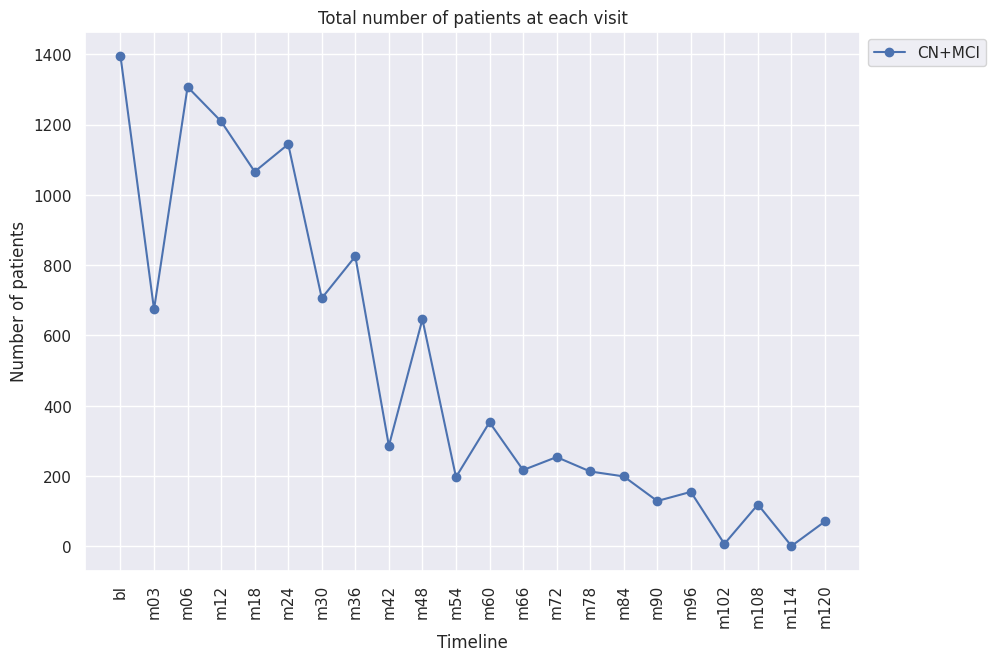

In [150]:
df = value_counts['CN+MCI']
ax = df.plot(figsize=(10, 7), marker='o')
xt = list(df.index)
ax.set_xticks(range(len(xt)))
ax.set_xticklabels(xt, rotation=90)

plt.xlabel('Timeline')
plt.ylabel('Number of patients')
plt.title('Total number of patients at each visit')
# plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
# plt.xticks(np.arange(len(temp_filt.columns)), list(temp_filt.index))
plt.show()

In [151]:
temp_filt = dx_dict['CN+MCI'].groupby('VISCODE')['DX'].value_counts(dropna=False)
temp_filt = temp_filt.reset_index()
temp_filt = temp_filt.pivot(index='VISCODE', columns='DX', values='count')
temp_filt = temp_filt.reindex(custom_order)
# temp_filt['Total'] = temp_filt.sum(axis=1)
temp_filt.fillna(0)

DX,NaN,Dementia,Dementia to MCI,MCI,MCI to Dementia,MCI to NL,NL,NL to Dementia,NL to MCI
VISCODE,,,,,,,,,
bl,5.0,1.0,1.0,864.0,0.0,2.0,521.0,0.0,1.0
m03,674.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
m06,2.0,1.0,0.0,753.0,46.0,11.0,482.0,0.0,12.0
m12,1.0,35.0,0.0,668.0,69.0,20.0,406.0,0.0,10.0
m18,741.0,54.0,1.0,225.0,35.0,4.0,6.0,0.0,0.0
m24,22.0,105.0,1.0,473.0,78.0,9.0,438.0,0.0,18.0
m30,706.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
m36,20.0,128.0,2.0,370.0,56.0,12.0,222.0,2.0,13.0
m42,286.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


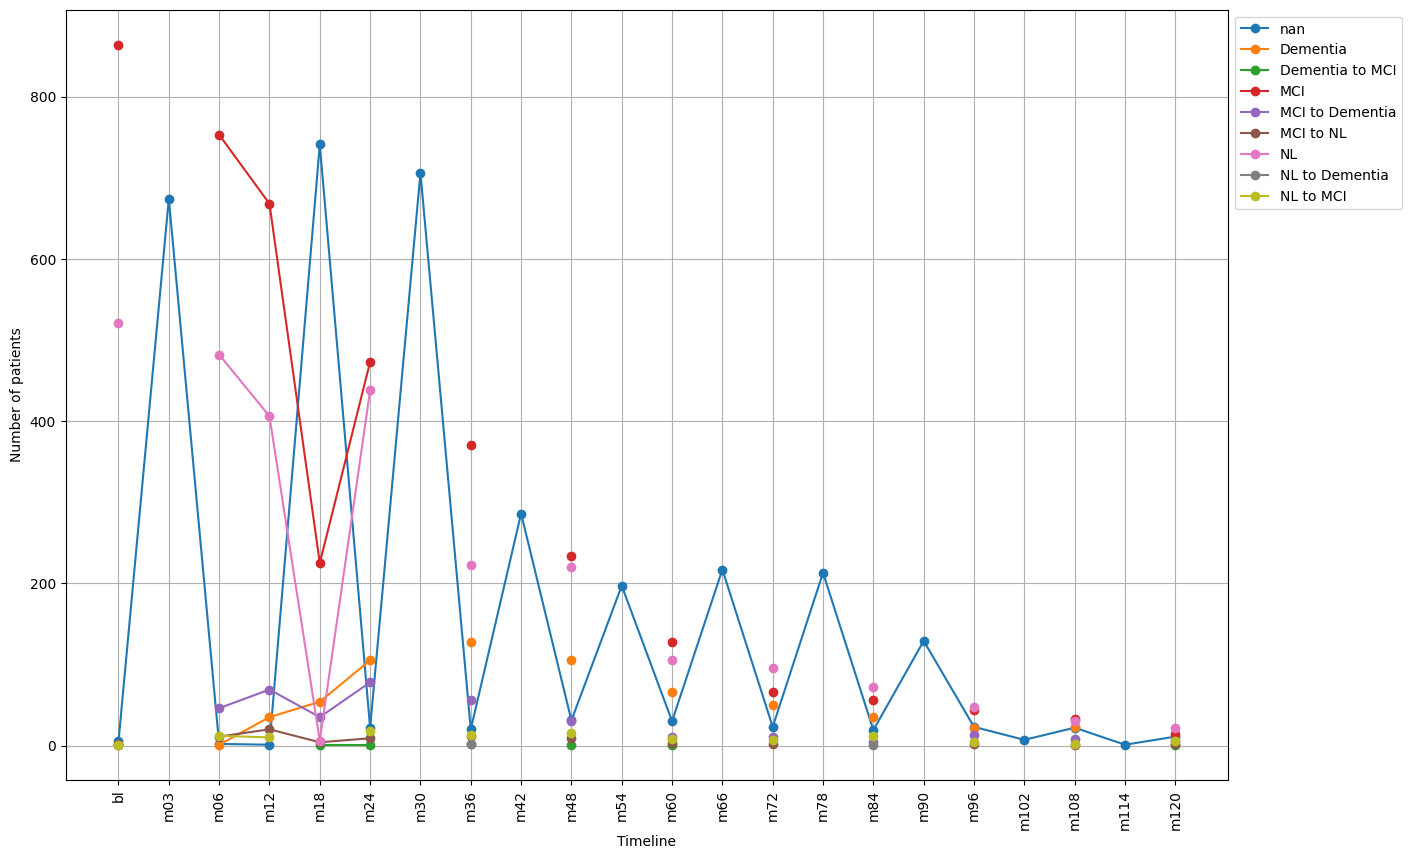

In [15]:
# temp_filt.plot.bar(figsize = (10,5), width=0.5)
# temp_filt.drop('Total')
ax = temp_filt.plot(figsize = (15,10), marker='o')
xt = list(temp_filt.index)
ax.set_xticks(range(len(xt)))
ax.set_xticklabels(xt, rotation=90)

plt.xlabel('Timeline')
plt.ylabel('Number of patients')
# plt.title('Rainfall Days per Month by Year')
# plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
# plt.xticks(np.arange(len(temp_filt.columns)), list(temp_filt.index))
plt.show()


In [48]:
#exploration of CN at bl
temp_filt = dx_dict['CN'].groupby('VISCODE')['DX'].value_counts(dropna=False)
temp_filt = temp_filt.reset_index()
temp_filt = temp_filt.pivot(index='VISCODE', columns='DX', values='count')
temp_filt = temp_filt.reindex(custom_order)
temp_filt['Total'] = temp_filt.sum(axis=1)
temp_filt.fillna(0)

DX,NaN,Dementia,Dementia to MCI,MCI,MCI to Dementia,MCI to NL,NL,NL to Dementia,NL to MCI,Total
VISCODE,,,,,,,,,,
bl,2.0,0.0,0.0,0.0,0.0,0.0,521.0,0.0,0.0,523.0
m03,232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0
m06,2.0,0.0,0.0,0.0,0.0,0.0,481.0,0.0,11.0,494.0
m12,0.0,0.0,0.0,9.0,0.0,1.0,400.0,0.0,7.0,417.0
m18,375.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,375.0
m24,9.0,0.0,0.0,9.0,3.0,0.0,412.0,0.0,17.0,450.0
m30,253.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253.0
m36,7.0,3.0,0.0,14.0,1.0,0.0,195.0,2.0,11.0,233.0
m42,107.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.0


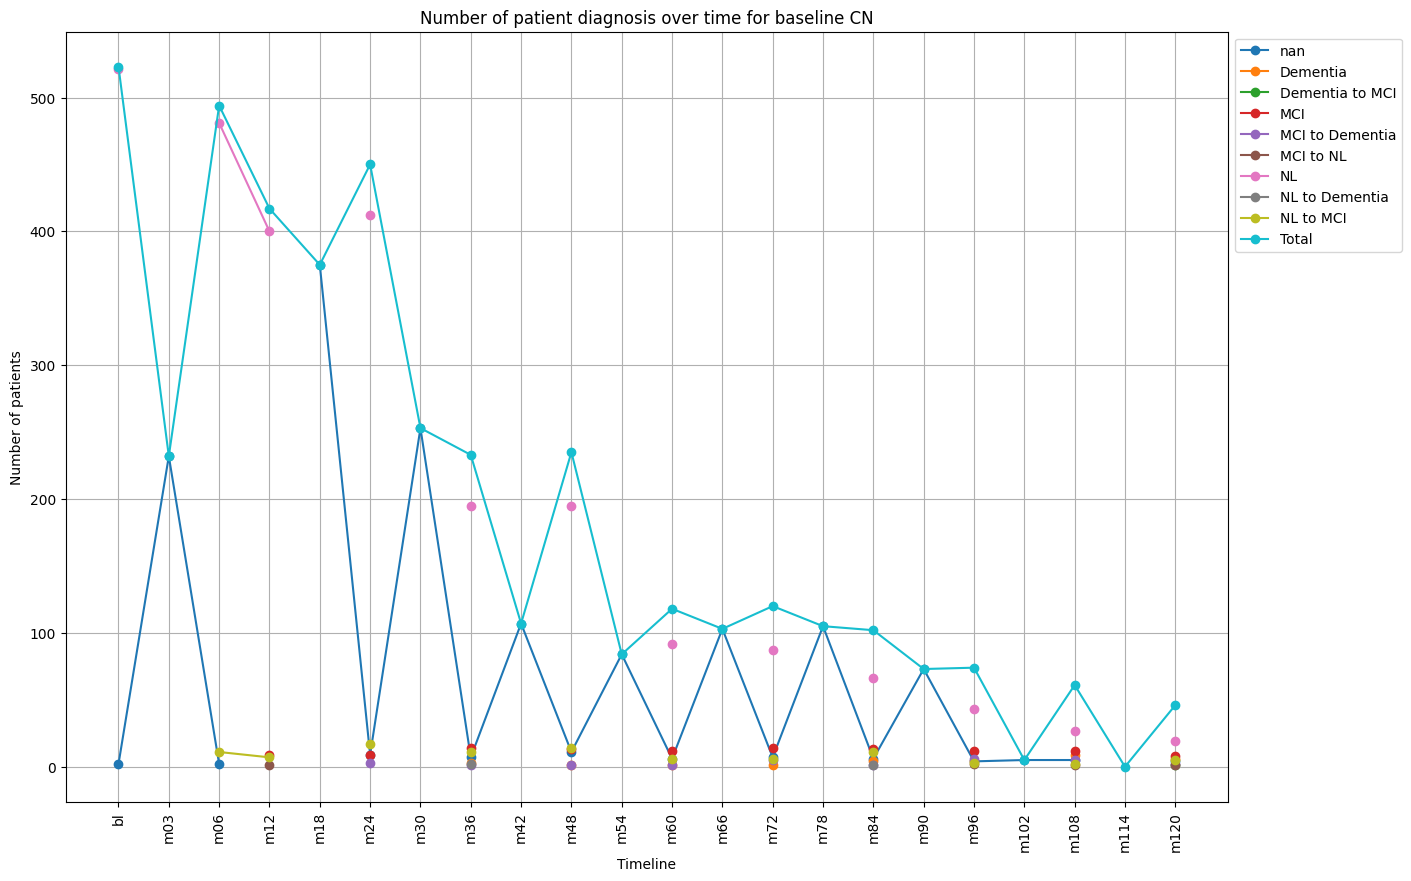

In [49]:
# temp_filt.plot.bar(figsize = (10,5), width=0.5)
ax = temp_filt.iloc[:,:].plot(figsize = (15,10), marker='o')
xt = list(temp_filt.index)
ax.set_xticks(range(len(xt)))
# ax.set_xticklabels(["%s-%02d" % item for item in df.index.tolist()], rotation=90)
ax.set_xticklabels(xt, rotation=90)
plt.xlabel('Timeline')
plt.ylabel('Number of patients')
plt.title('Number of patient diagnosis over time for baseline CN')
# plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
# plt.xticks(np.arange(len(temp_filt.columns)), list(temp_filt.index))
plt.show()


In [50]:
#exploration of MCI at bl
temp_filt = dx_dict['MCI'].groupby('VISCODE')['DX'].value_counts(dropna=False)
temp_filt = temp_filt.reset_index()
temp_filt = temp_filt.pivot(index='VISCODE', columns='DX', values='count')
temp_filt = temp_filt.reindex(custom_order)
temp_filt['Total'] = temp_filt.sum(axis=1)
temp_filt.fillna(0)

DX,NaN,Dementia,Dementia to MCI,MCI,MCI to Dementia,MCI to NL,NL,NL to MCI,Total
VISCODE,,,,,,,,,
bl,3.0,1.0,1.0,864.0,0.0,2.0,0.0,1.0,872.0
m03,442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,442.0
m06,0.0,1.0,0.0,753.0,46.0,11.0,1.0,1.0,813.0
m12,1.0,35.0,0.0,659.0,69.0,19.0,6.0,3.0,792.0
m18,366.0,54.0,1.0,225.0,35.0,4.0,6.0,0.0,691.0
m24,13.0,105.0,1.0,464.0,75.0,9.0,26.0,1.0,694.0
m30,453.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,453.0
m36,13.0,125.0,2.0,356.0,55.0,12.0,27.0,2.0,592.0
m42,179.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,179.0


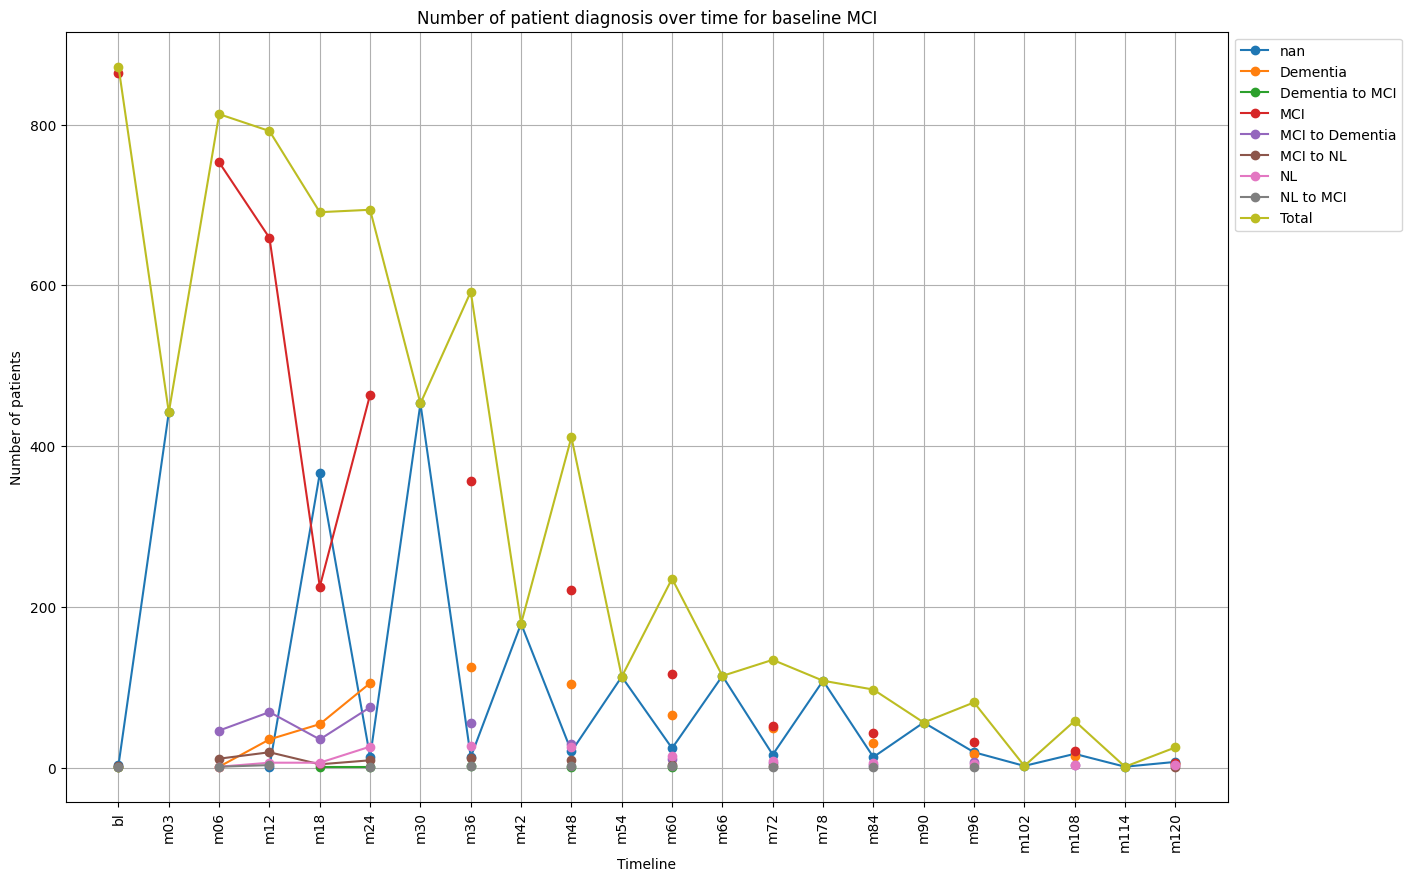

In [51]:
# temp_filt.plot.bar(figsize = (10,5), width=0.5)
ax = temp_filt.plot(figsize = (15,10), marker='o')
xt = list(temp_filt.index)
ax.set_xticks(range(len(xt)))
# ax.set_xticklabels(["%s-%02d" % item for item in df.index.tolist()], rotation=90)
ax.set_xticklabels(xt, rotation=90)
plt.xlabel('Timeline')
plt.ylabel('Number of patients')
plt.title('Number of patient diagnosis over time for baseline MCI')
# plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
# plt.xticks(np.arange(len(temp_filt.columns)), list(temp_filt.index))
plt.show()


In [52]:
value_counts_t

,count
VISCODE,
bl,1395
m06,1307
m12,1209
m18,1066
m24,1144
m36,825
m48,646
m60,353
m72,254


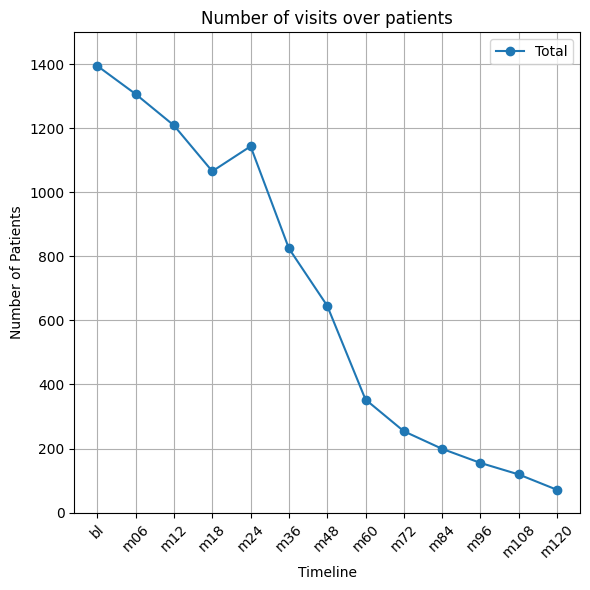

In [53]:
# Plotting the data
plt.figure(figsize=(6, 6))
# plt.plot(custom_order, np.array(value_counts['CN']), marker='o', label='Baseline CN')
# plt.plot(custom_order, np.array(value_counts['MCI']), marker='o', label='Baseline MCI')
# plt.plot(custom_order, np.array(value_counts['DEM']), marker='o', label='Baseline DEM')

plt.plot(year_order, np.array(value_counts_t), marker='o', label='Total')
# plt.plot()

plt.title('Number of visits over patients')
plt.xlabel('Timeline')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.ylim([0, 1500])
plt.tight_layout()

plt.show()


In [135]:
rid_5 = []
visits_ = []
# vists_n = []
for i in dx_dict['CN+MCI_f'].groupby('RID'): #rid = patient ids
    temp_visit = []
    # temp = []
    for j in list(i[1]['VISCODE']):
        if j in chosen_order:
            temp_visit.append(1)
            # temp.append(j)
    if len(temp_visit) == len(chosen_order):
        rid_5.append(i[0])
        visits_.append(temp_visit)
        # vists_n.append(temp)
nvisits = pd.DataFrame(visits_, columns=chosen_order, index=rid_5)
nvisits = nvisits.reset_index(drop=True)

In [136]:
rid_5_all = []
visits_all = []
for i in TADPOLE_DATA.groupby('RID'): #rid = patient ids
    temp_visit = []
    # temp = []
    for j in list(i[1]['VISCODE']):
        if j in chosen_order:
            temp_visit.append(1)
            # temp.append(j)
    if len(temp_visit) == len(chosen_order):
        rid_5_all.append(i[0])
        visits_all.append(temp_visit)
        # vists_n.append(temp)
nvisits_all = pd.DataFrame(visits_all, columns=chosen_order, index=rid_5_all)
nvisits_all = nvisits.reset_index(drop=True)

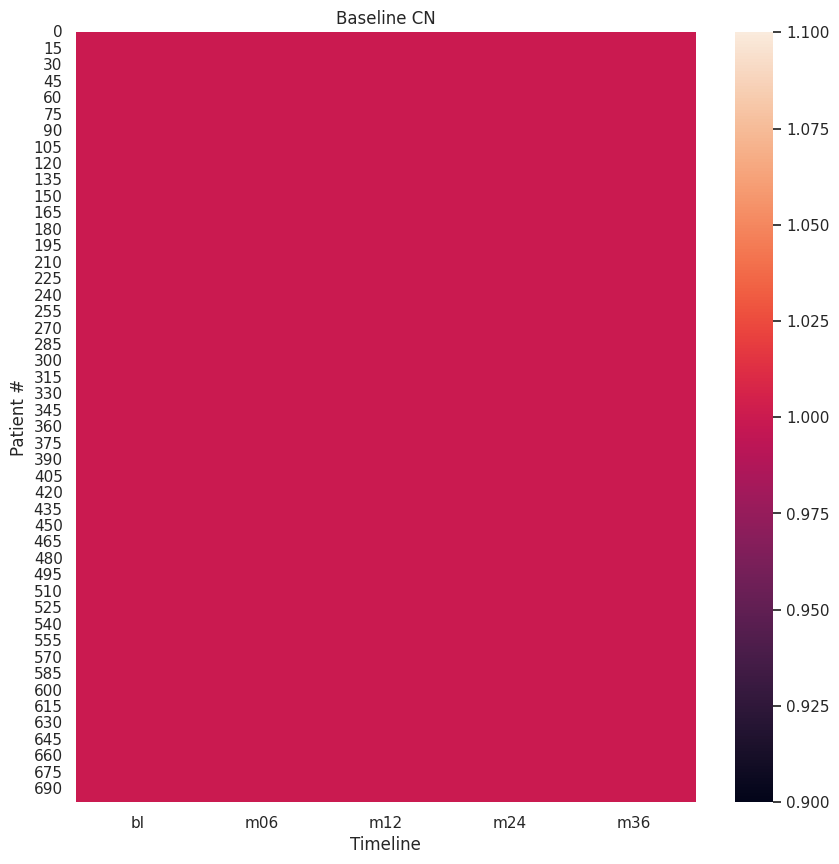

In [129]:
# nvisits_ = nvisits.reset_index(drop=True)
sns.set()
plt.figure(figsize=(10,10))
sns.heatmap(nvisits)

plt.xlabel('Timeline')
plt.ylabel('Patient #')
plt.title('Baseline CN')

plt.show()

In [139]:
# df_filt = dx_dict['CN+MCI_f'][dx_dict['CN+MCI_f']['RID'].isin(rid_5)] #no dementia at baseline
df_filt = TADPOLE_DATA[TADPOLE_DATA['RID'].isin(rid_5)] #dementia at baseline
print(len(df_filt['RID'].unique()))
# df_filt = df_filt.dropna(subset='RID')
# print(len(df_filt['RID'].unique()))

1055


In [140]:
print(TADPOLE_DATA['DX'].unique())
print()
for i in dx_dict:
    print(i, dx_dict[i]['DX'].unique())

['NL' 'Dementia' 'MCI' 'NL to MCI' 'MCI to Dementia' 'MCI to NL'
 'Dementia to MCI' nan 'NL to Dementia']

CN ['NL' 'NL to MCI' 'MCI' 'MCI to Dementia' nan 'MCI to NL' 'Dementia'
 'NL to Dementia' 'Dementia to MCI']
MCI ['MCI' 'MCI to Dementia' 'Dementia' 'MCI to NL' 'NL to MCI' 'NL'
 'Dementia to MCI' nan]
DEM ['Dementia' 'Dementia to MCI' 'MCI' 'MCI to Dementia' nan]
CN+MCI ['NL' 'MCI' 'NL to MCI' 'MCI to Dementia' 'Dementia' 'MCI to NL'
 'Dementia to MCI' nan 'NL to Dementia']
CN+MCI- ['NL' 'MCI' 'NL to MCI' 'MCI to Dementia' 'Dementia' 'MCI to NL'
 'Dementia to MCI' nan 'NL to Dementia']
CN+MCI_f ['NL' 'MCI' 'NL to MCI' 'MCI to Dementia' 'Dementia' 'MCI to NL'
 'Dementia to MCI' nan 'NL to Dementia']


In [141]:
dx_vc = df_filt.groupby('VISCODE')['DX'].value_counts(dropna=False)

dx_vc = dx_vc.reset_index()
dx_vc = dx_vc.pivot(index='VISCODE', columns='DX', values='count')
dx_vc['Total'] = dx_vc.sum(axis=1)
dx_vc.fillna(0)
#A to B labels are assigned B

DX,NaN,Dementia,Dementia to MCI,MCI,MCI to Dementia,MCI to NL,NL,NL to Dementia,NL to MCI,Total
VISCODE,,,,,,,,,,
bl,0.0,0.0,1.0,674.0,0.0,2.0,377.0,0.0,1.0,1055.0
m03,537.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,537.0
m06,2.0,0.0,0.0,633.0,34.0,9.0,367.0,0.0,10.0,1055.0
m102,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
m108,21.0,23.0,0.0,32.0,8.0,0.0,28.0,0.0,2.0,114.0
m12,0.0,29.0,0.0,576.0,54.0,20.0,368.0,0.0,8.0,1055.0
m120,11.0,11.0,1.0,14.0,5.0,2.0,19.0,0.0,4.0,67.0
m18,682.0,49.0,1.0,197.0,29.0,4.0,6.0,0.0,0.0,968.0
m24,14.0,104.0,1.0,459.0,78.0,9.0,377.0,0.0,13.0,1055.0


In [28]:
len(dx_dict['CN+MCI_f'][dx_dict['CN+MCI_f']['DX'] == np.nan])

0

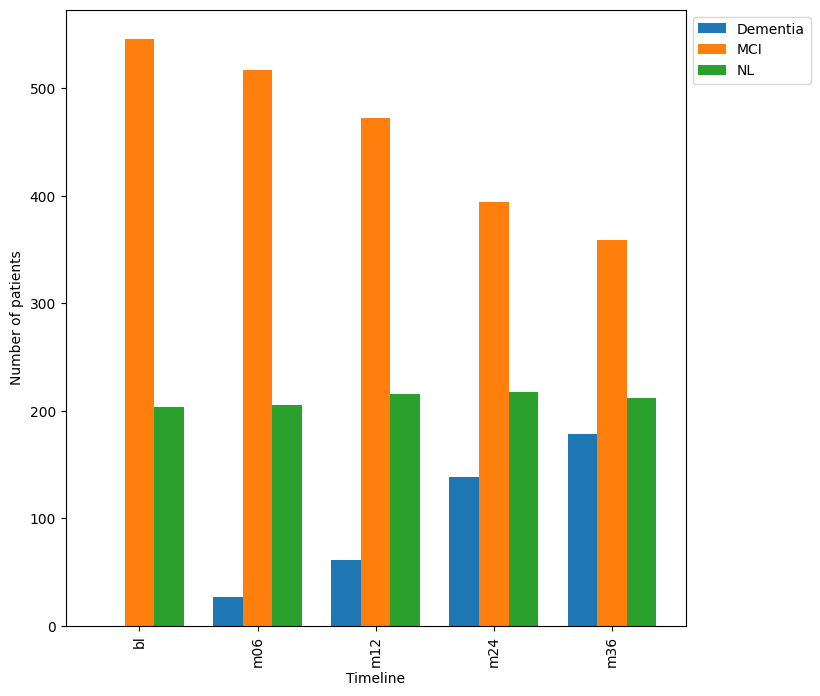

In [58]:

sns.reset_orig()
# ax = pivot_dx_valueCounts_dx_CN_MCI_f_.plot(figsize=(7, 8), marker='o')
ax = dx_vc.iloc[:,:-1].plot.bar(figsize=(8, 8), width=0.75)

# for container in ax.containers:
#     ax.bar_label(container)

# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xlabel('Timeline')
plt.ylabel('Number of patients')
# plt.title('Rainfall Days per Month by Year')
# plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
# plt.grid(True)
plt.show()


In [60]:
df_filt_all_code = copy.deepcopy(df_filt)
df_filt_all_code = df_filt[df_filt['DX'].isin(['NL', 'Dementia', 'MCI', 'NL to MCI', 'MCI to Dementia', 'MCI to NL', 'Dementia to MCI', 'NL to Dementia'])] # get rid of nans

In [61]:
dx_vc = df_filt_all_code.groupby('VISCODE')['DX'].value_counts(dropna=False)

dx_vc = dx_vc.reset_index()
dx_vc = dx_vc.pivot(index='VISCODE', columns='DX', values='count')
dx_vc['Total'] = dx_vc.sum(axis=1)
dx_vc.fillna(0)

DX,Dementia,Dementia to MCI,MCI,MCI to Dementia,MCI to NL,NL,NL to Dementia,NL to MCI,Total
VISCODE,,,,,,,,,
bl,0.0,0.0,560.0,0.0,2.0,204.0,0.0,1.0,767.0
m06,0.0,0.0,523.0,29.0,9.0,199.0,0.0,7.0,767.0
m12,26.0,0.0,476.0,39.0,20.0,199.0,0.0,7.0,767.0
m24,83.0,1.0,389.0,59.0,8.0,212.0,0.0,10.0,762.0
m36,128.0,2.0,347.0,48.0,12.0,200.0,2.0,12.0,751.0


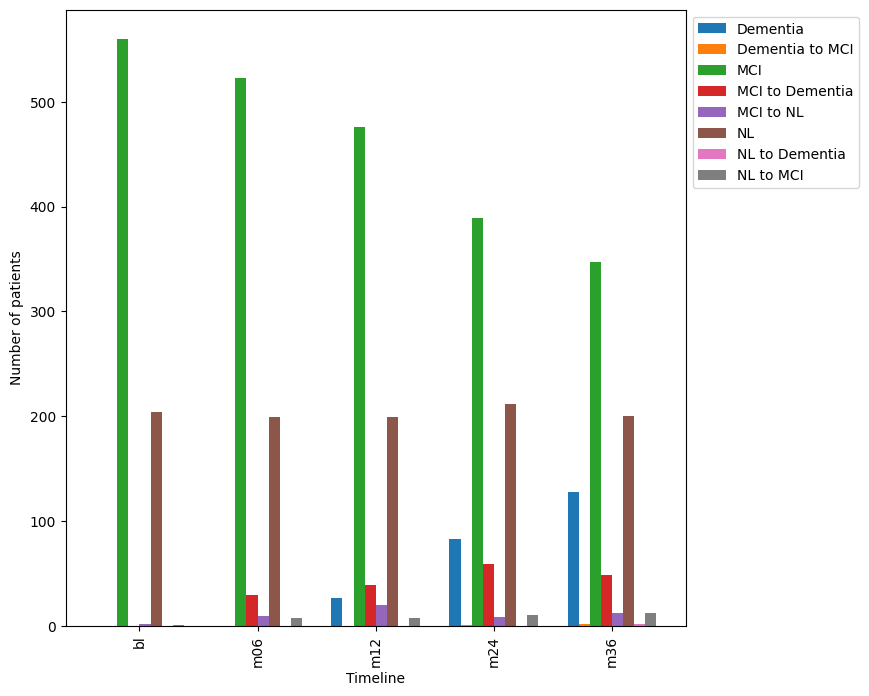

In [62]:

sns.reset_orig()
ax = dx_vc.iloc[:,:-1].plot.bar(figsize=(8, 8), width=0.75)

plt.xlabel('Timeline')
plt.ylabel('Number of patients')
# plt.title('Rainfall Days per Month by Year')
# plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
# plt.grid(True)
plt.show()


In [63]:
rid_5 = []
visits_ = []
# vists_n = []
for i in df_filt_all_code.groupby('RID'):
    temp_visit = []
    # temp = []
    for j in list(i[1]['VISCODE']):
        if j in chosen_order:
            temp_visit.append(1)
            # temp.append(j)
    if len(temp_visit) == 5:
        rid_5.append(i[0])
        visits_.append(temp_visit)
        # vists_n.append(temp)


    
nvisits = pd.DataFrame(visits_, columns=chosen_order, index=rid_5)
nvisits = nvisits.reset_index(drop=True)

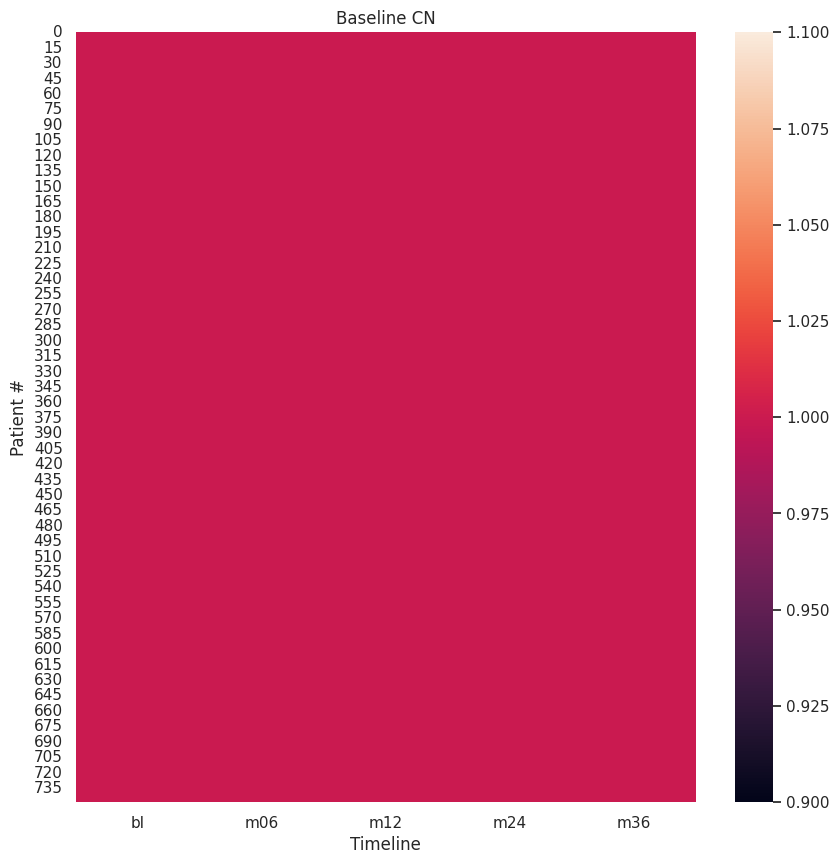

In [64]:
# nvisits_ = nvisits.reset_index(drop=True)
sns.set()
plt.figure(figsize=(10,10))
sns.heatmap(nvisits)

plt.xlabel('Timeline')
plt.ylabel('Patient #')
plt.title('Baseline CN')

plt.show()

In [65]:
df_filt_all_code = df_filt_all_code[df_filt_all_code['RID'].isin(rid_5)]
print(len(df_filt_all_code['RID'].unique()))

749


In [66]:
dx_vc = df_filt_all_code.groupby('VISCODE')['DX'].value_counts(dropna=False)

dx_vc = dx_vc.reset_index()
dx_vc = dx_vc.pivot(index='VISCODE', columns='DX', values='count')
dx_vc['Total'] = dx_vc.sum(axis=1)
dx_vc.fillna(0)

DX,Dementia,Dementia to MCI,MCI,MCI to Dementia,MCI to NL,NL,NL to Dementia,NL to MCI,Total
VISCODE,,,,,,,,,
bl,0.0,0.0,545.0,0.0,2.0,201.0,0.0,1.0,749.0
m06,0.0,0.0,510.0,27.0,9.0,196.0,0.0,7.0,749.0
m12,24.0,0.0,465.0,37.0,20.0,196.0,0.0,7.0,749.0
m24,80.0,1.0,383.0,58.0,8.0,209.0,0.0,10.0,749.0
m36,128.0,2.0,345.0,48.0,12.0,200.0,2.0,12.0,749.0


In [67]:
rid = df_filt_all_code.groupby('VISCODE')[['RID', 'DX']].value_counts(dropna=False)

rid = rid.reset_index()
rid = rid.pivot(index='RID', columns='VISCODE', values='DX')
# rid['Total'] = rid.sum(axis=1)


In [68]:
print(rid.isnull().sum())


VISCODE
bl     0
m06    0
m12    0
m24    0
m36    0
dtype: int64


In [69]:
list(rid.iloc[0])

['NL', 'NL', 'NL', 'NL', 'NL']

In [70]:
import plotly.express as px
import nbformat
pd.DataFrame.iteritems = pd.DataFrame.items
df = copy.deepcopy(rid)
df = df.reset_index()

del df['RID']

# diags = ['NL', 'MCI', 'MCI to Dementia', 'Dementia', 'NL to MCI', 'NL to Dementia']
diags = ['NL', 'Dementia', 'MCI', 'NL to MCI', 'MCI to Dementia', 'MCI to NL', 'Dementia to MCI', 'NL to Dementia']

fig = px.parallel_categories(df, dimensions=chosen_order, labels={
    "bl": "Baseline",
    "m06": "Month 6",
    "m12": "Month 12",
    "m24": "Month 24",
    "m36": "Month 36",
})
# fig = px.parallel_categories(df1, dimensions=chosen_order, color=df1.index, color_continuous_scale=px.colors.sequential.Inferno)
# fig = px.parallel_categories(df1, dimensions=chosen_order, color='bl', color_continuous_scale=px.colors.sequential.Inferno)



fig.update_layout(
    width=1350,
    height=800,
    # margin=dict(l=20, r=50, t=20, b=20),
    # paper_bgcolor="LightSteelBlue",
)
color_for_nodes = ["red","green","blue","violet","maroon", "yellow"]
# fig.update_traces(node_color = color_for_nodes)
fig.show()
fig.write_html("Disease_progression_firstFiveVisits.html")
# fig.write_image("Disease_progression_firstFiveVisits.html.png")

In [71]:
df_filt_all_code['DX'] = df_filt_all_code['DX'].map({
    'NL': 'NL',
    'MCI to NL': 'NL',
    'MCI': 'MCI',
    'NL to MCI': 'MCI',
    'Dementia to MCI': 'MCI',
    'MCI to Dementia': 'Dementia',
    'Dementia': 'Dementia',
    'NL to Dementia': 'Dementia'
})

#grouping diagnoses for final cohort

In [72]:
dx_vc = df_filt_all_code.groupby('VISCODE')['DX'].value_counts(dropna=False)

dx_vc = dx_vc.reset_index()
dx_vc = dx_vc.pivot(index='VISCODE', columns='DX', values='count')
dx_vc['Total'] = dx_vc.sum(axis=1)
dx_vc.fillna(0)

DX,Dementia,MCI,NL,Total
VISCODE,,,,
bl,0.0,546.0,203.0,749.0
m06,27.0,517.0,205.0,749.0
m12,61.0,472.0,216.0,749.0
m24,138.0,394.0,217.0,749.0
m36,178.0,359.0,212.0,749.0


In [73]:
df_filt_all_code['VISCODE'].value_counts()

VISCODE
bl     749
m06    749
m12    749
m24    749
m36    749
Name: count, dtype: int64

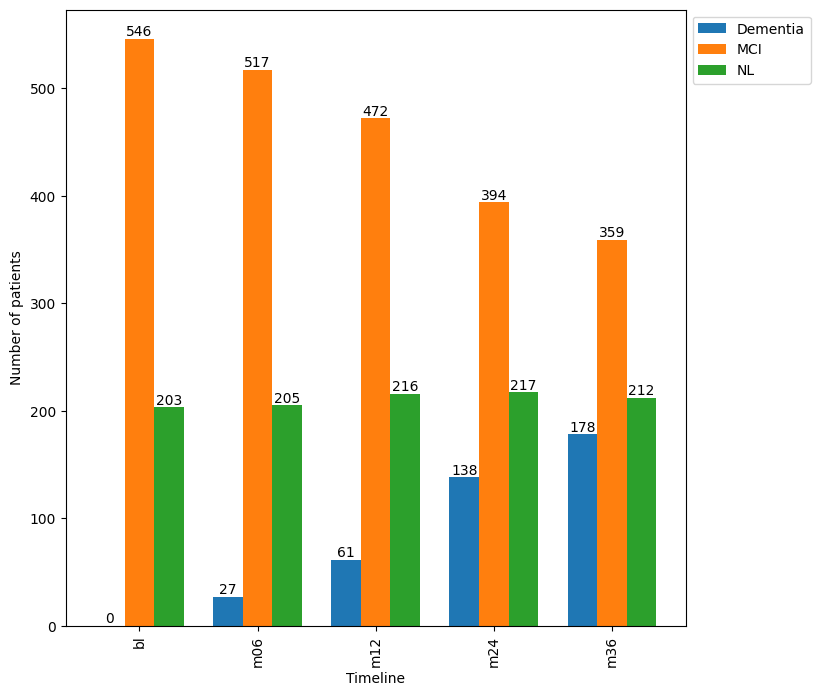

In [75]:

sns.reset_orig()
ax = dx_vc.iloc[:,:-1].plot.bar(figsize=(8, 8), width=0.75)

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Timeline')
plt.ylabel('Number of patients')
# plt.title('Rainfall Days per Month by Year')
# plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
# plt.grid(True)
plt.show()


In [76]:
rid = df_filt_all_code.groupby('VISCODE')[['RID', 'DX']].value_counts(dropna=False)

rid = rid.reset_index()
rid = rid.pivot(index='RID', columns='VISCODE', values='DX')
# rid['Total'] = rid.sum(axis=1)


In [77]:
import plotly.express as px
pd.DataFrame.iteritems = pd.DataFrame.items
df = copy.deepcopy(rid)
df = df.reset_index()

del df['RID']

# diags = ['NL', 'MCI', 'MCI to Dementia', 'Dementia', 'NL to MCI', 'NL to Dementia']
diags = ['NL', 'Dementia', 'MCI', 'NL to MCI', 'MCI to Dementia', 'MCI to NL', 'Dementia to MCI', 'NL to Dementia']

fig = px.parallel_categories(df, dimensions=chosen_order, labels={
    "bl": "Baseline",
    "m06": "Month 6",
    "m12": "Month 12",
    "m24": "Month 24",
    "m36": "Month 36",
})
# fig = px.parallel_categories(df1, dimensions=chosen_order, color=df1.index, color_continuous_scale=px.colors.sequential.Inferno)
# fig = px.parallel_categories(df1, dimensions=chosen_order, color='bl', color_continuous_scale=px.colors.sequential.Inferno)



fig.update_layout(
    width=1350,
    height=800,
    # margin=dict(l=20, r=50, t=20, b=20),
    # paper_bgcolor="LightSteelBlue",
)
color_for_nodes = ["red","green","blue","violet","maroon", "yellow"]
# fig.update_traces(node_color = color_for_nodes)
fig.show()
fig.write_html("Disease_progression_firstFiveVisits.html")
# fig.write_image("Disease_progression_firstFiveVisits.html.png")

In [78]:
#['NL' 'Dementia' 'MCI' 'NL to MCI' 'MCI to Dementia' 'MCI to NL' 'Dementia to MCI' nan 'NL to Dementia']

# df_filt_old = dx_dict['CN+MCI_f'][(dx_dict['CN+MCI_f']['DX']=='NL') | 
#                               (dx_dict['CN+MCI_f']['DX']=='Dementia') |
#                               (dx_dict['CN+MCI_f']['DX']=='MCI') |
#                               (dx_dict['CN+MCI_f']['DX']=='NL to MCI') |
#                               (dx_dict['CN+MCI_f']['DX']=='MCI to Dementia') |
#                               (dx_dict['CN+MCI_f']['DX']=='NL to Dementia')]


In [79]:
df_filt = df_filt[df_filt['DX'].isin(['NL', 'Dementia', 'MCI', 'NL to MCI', 'MCI to Dementia', 'NL to Dementia'])]

In [80]:
df_filt.head()

,RID,PTID,VISCODE,SITE,D1,D2,COLPROT,ORIGPROT,EXAMDATE,DX_bl,...,PHASE_UPENNBIOMK9_04_19_17,BATCH_UPENNBIOMK9_04_19_17,KIT_UPENNBIOMK9_04_19_17,STDS_UPENNBIOMK9_04_19_17,RUNDATE_UPENNBIOMK9_04_19_17,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,COMMENT_UPENNBIOMK9_04_19_17,update_stamp_UPENNBIOMK9_04_19_17
10,5,011_S_0005,bl,11,1,0,ADNI1,ADNI1,2005-09-07,CN,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-11-22,547.3,337,33.43,NaN,2017-04-20 14:39:54.0
11,5,011_S_0005,m06,11,1,0,ADNI1,ADNI1,2006-03-09,CN,...,,,,,,,,,,
12,5,011_S_0005,m12,11,1,0,ADNI1,ADNI1,2006-09-05,CN,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-11-22,472.8,334.1,34.04,NaN,2017-04-20 14:39:54.0
13,5,011_S_0005,m24,11,1,0,ADNI1,ADNI1,2007-09-07,CN,...,,,,,,,,,,
14,5,011_S_0005,m36,11,1,0,ADNI1,ADNI1,2008-09-10,CN,...,,,,,,,,,,


In [83]:
# df_filt.groupby(['VISCODE'])['DX'].value_counts()
df_filt['DX'].unique()

array(['NL', 'MCI', 'MCI to Dementia', 'Dementia', 'NL to MCI',
       'NL to Dementia'], dtype=object)

In [84]:
dx_vc = df_filt.groupby('VISCODE')['DX'].value_counts(dropna=False)

dx_vc = dx_vc.reset_index()
dx_vc = dx_vc.pivot(index='VISCODE', columns='DX', values='count')
dx_vc['Total'] = dx_vc.sum(axis=1)
dx_vc.fillna(0)

DX,Dementia,MCI,MCI to Dementia,NL,NL to Dementia,NL to MCI,Total
VISCODE,,,,,,,
bl,0.0,560.0,0.0,204.0,0.0,1.0,765.0
m06,0.0,523.0,29.0,199.0,0.0,7.0,758.0
m12,26.0,476.0,39.0,199.0,0.0,7.0,747.0
m24,83.0,389.0,59.0,212.0,0.0,10.0,753.0
m36,128.0,347.0,48.0,200.0,2.0,12.0,737.0


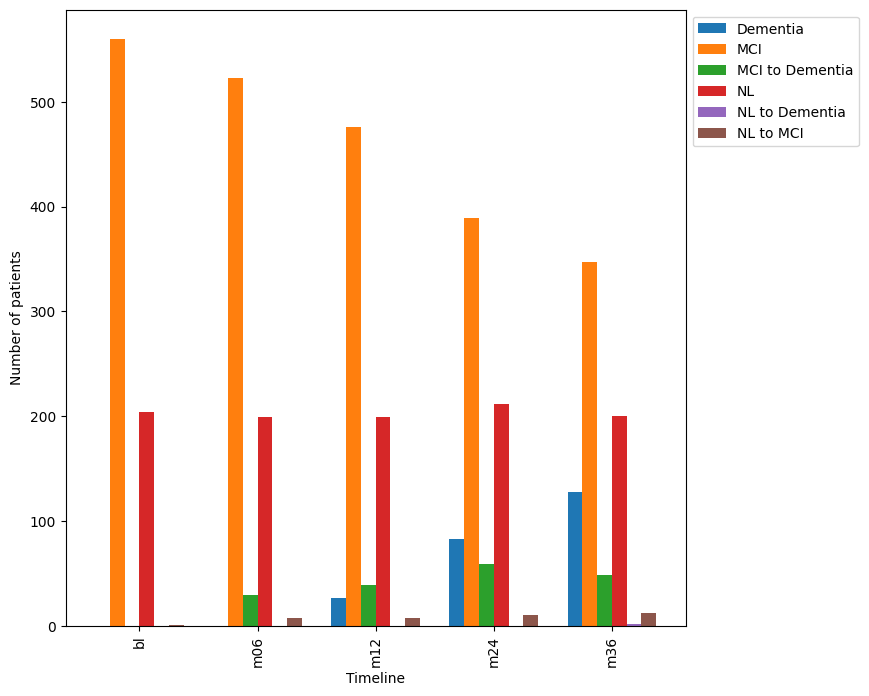

In [85]:

sns.reset_orig()
ax = dx_vc.iloc[:,:-1].plot.bar(figsize=(8, 8), width=0.75)

plt.xlabel('Timeline')
plt.ylabel('Number of patients')
# plt.title('Rainfall Days per Month by Year')
# plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
# plt.grid(True)
plt.show()


In [86]:
rid_5 = []
visits_ = []
# vists_n = []
for i in df_filt.groupby('RID'):
    temp_visit = []
    # temp = []
    for j in list(i[1]['VISCODE']):
        if j in chosen_order:
            temp_visit.append(1)
            # temp.append(j)
    if len(temp_visit) == 5:
        rid_5.append(i[0])
        visits_.append(temp_visit)
        # vists_n.append(temp)


    
nvisits = pd.DataFrame(visits_, columns=chosen_order, index=rid_5)
nvisits = nvisits.reset_index(drop=True)

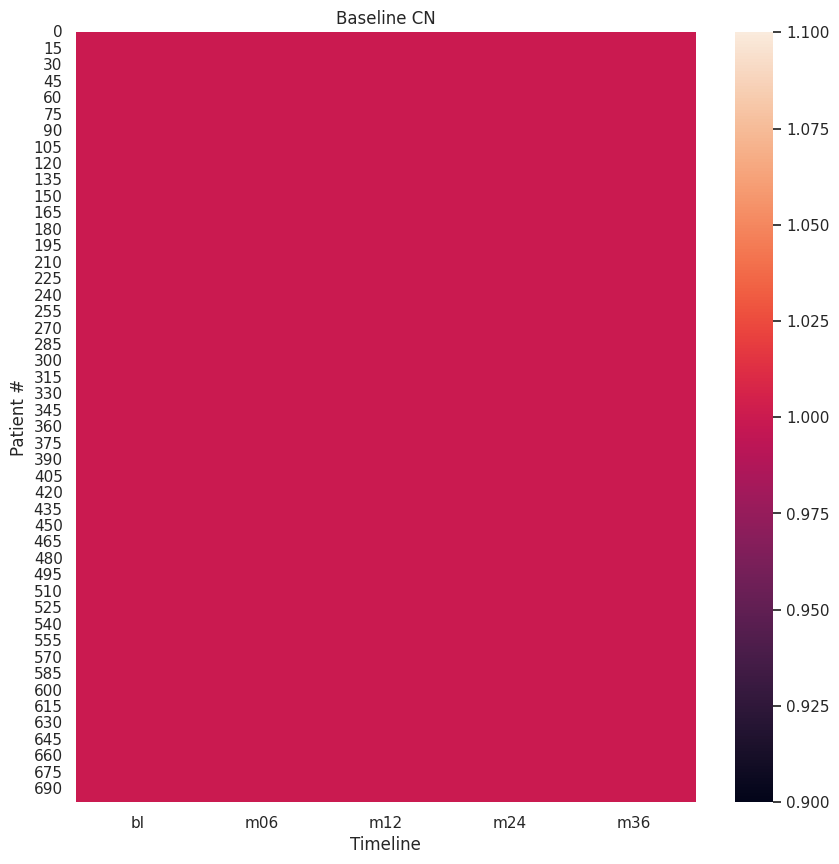

In [87]:
# nvisits_ = nvisits.reset_index(drop=True)
sns.set()
plt.figure(figsize=(10,10))
sns.heatmap(nvisits)

plt.xlabel('Timeline')
plt.ylabel('Patient #')
plt.title('Baseline CN')

plt.show()

In [88]:
df_filt = df_filt[df_filt['RID'].isin(rid_5)]
print(len(df_filt['RID'].unique()))

702


In [89]:
len(rid_5)

702

In [90]:
dx_vc = df_filt.groupby('VISCODE')['DX'].value_counts(dropna=False)

dx_vc = dx_vc.reset_index()
dx_vc = dx_vc.pivot(index='VISCODE', columns='DX', values='count')
dx_vc['Total'] = dx_vc.sum(axis=1)
dx_vc.fillna(0)

DX,Dementia,MCI,MCI to Dementia,NL,NL to Dementia,NL to MCI,Total
VISCODE,,,,,,,
bl,0.0,501.0,0.0,200.0,0.0,1.0,702.0
m06,0.0,475.0,27.0,195.0,0.0,5.0,702.0
m12,24.0,447.0,35.0,192.0,0.0,4.0,702.0
m24,79.0,370.0,57.0,188.0,0.0,8.0,702.0
m36,128.0,338.0,48.0,176.0,2.0,10.0,702.0


In [91]:
rid = df_filt.groupby('VISCODE')[['RID', 'DX']].value_counts(dropna=False)

rid = rid.reset_index()
rid = rid.pivot(index='RID', columns='VISCODE', values='DX')
# rid['Total'] = rid.sum(axis=1)


In [92]:
rid.isnull().sum()

VISCODE
bl     0
m06    0
m12    0
m24    0
m36    0
dtype: int64

In [93]:
list(rid.iloc[0])

['NL', 'NL', 'NL', 'NL', 'NL']

In [94]:
dx_progression = {}
for i in range(rid.shape[0]):
    dx_p = tuple(rid.iloc[i])
    if dx_p not in dx_progression.keys():
        dx_progression[dx_p] = 1
    else:
        dx_progression[dx_p] += 1
    # if dx_progression[dx_p]==:
    #     dx_progression[dx_p] = 0
    # else

In [95]:
dx_progression = dict(sorted(dx_progression.items(), key=lambda item: item[1], reverse=True))
dx_progression

{('MCI', 'MCI', 'MCI', 'MCI', 'MCI'): 319,
 ('NL', 'NL', 'NL', 'NL', 'NL'): 170,
 ('MCI', 'MCI', 'MCI', 'MCI to Dementia', 'Dementia'): 43,
 ('MCI', 'MCI', 'MCI', 'MCI', 'MCI to Dementia'): 40,
 ('MCI', 'MCI', 'MCI to Dementia', 'Dementia', 'Dementia'): 31,
 ('MCI', 'MCI', 'MCI', 'Dementia', 'Dementia'): 24,
 ('MCI', 'MCI to Dementia', 'Dementia', 'Dementia', 'Dementia'): 22,
 ('NL', 'NL', 'NL', 'NL', 'NL to MCI'): 9,
 ('NL', 'NL', 'NL', 'NL to MCI', 'MCI'): 7,
 ('MCI', 'MCI', 'MCI', 'MCI to Dementia', 'MCI to Dementia'): 5,
 ('MCI', 'MCI', 'MCI', 'NL', 'NL'): 2,
 ('MCI', 'MCI', 'MCI', 'NL', 'MCI'): 2,
 ('NL', 'NL', 'NL', 'NL', 'NL to Dementia'): 2,
 ('MCI', 'MCI', 'MCI to Dementia', 'MCI', 'MCI'): 2,
 ('NL', 'NL to MCI', 'MCI', 'MCI to Dementia', 'Dementia'): 2,
 ('NL', 'NL', 'NL to MCI', 'MCI', 'MCI'): 2,
 ('MCI', 'MCI', 'MCI', 'MCI to Dementia', 'MCI'): 2,
 ('NL', 'NL to MCI', 'MCI', 'MCI', 'MCI to Dementia'): 1,
 ('NL', 'NL', 'NL', 'NL', 'MCI'): 1,
 ('NL', 'NL', 'NL', 'NL to MCI', 

In [96]:
rid.head()

VISCODE,bl,m06,m12,m24,m36
RID,,,,,
5,NL,NL,NL,NL,NL
6,MCI,MCI,MCI,MCI,MCI
14,NL,NL,NL,NL,NL
15,NL,NL,NL,NL,NL
16,NL,NL,NL,NL,NL


In [97]:
import plotly.express as px
pd.DataFrame.iteritems = pd.DataFrame.items
df = copy.deepcopy(rid)
df = df.reset_index()

del df['RID']

diags = ['NL', 'MCI', 'MCI to Dementia', 'Dementia', 'NL to MCI', 'NL to Dementia']

fig = px.parallel_categories(df, dimensions=chosen_order, labels={
    "bl": "Baseline",
    "m06": "Month 6",
    "m12": "Month 12",
    "m24": "Month 24",
    "m36": "Month 36",
})
# fig = px.parallel_categories(df1, dimensions=chosen_order, color=df1.index, color_continuous_scale=px.colors.sequential.Inferno)
# fig = px.parallel_categories(df1, dimensions=chosen_order, color='bl', color_continuous_scale=px.colors.sequential.Inferno)



fig.update_layout(
    width=1350,
    height=800,
    # margin=dict(l=20, r=50, t=20, b=20),
    # paper_bgcolor="LightSteelBlue",
)
color_for_nodes = ["red","green","blue","violet","maroon", "yellow"]
# fig.update_traces(node_color = color_for_nodes)
fig.show()
fig.write_html("Disease_progression_firstFiveVisits.html")
# fig.write_image("Disease_progression_firstFiveVisits.html.png")

In [98]:
import plotly.graph_objects as go
## Creating parallel categores chart# creation is edible integer
# df["is-edible-bool"] = df["is-edible"].map({"edible": 1, "poisonous": 0})# Create dimensions
# stalk-shape
bl_dim = go.parcats.Dimension(
    # values=df1['bl'], categoryorder="category ascending", label="Baseline"
    values=df['bl'], label="Baseline"
)
# stalk-root
m06_dim = go.parcats.Dimension(values=df['m06'], label="month6")
# stalk-surface-above-ring
m12_dim = go.parcats.Dimension(
    values=df["m12"], label="month12"
)
# stalk-surface-below-ring
m24_dim = go.parcats.Dimension(
    values=df["m24"], label="month24"
)# is-edible
m36_dim = go.parcats.Dimension(
    values=df["m36"],
    label="month36",
    # categoryarray=["edible", "poisonous"],
    # ticktext=["edible", "poisonous"],
)# Create parcats trace
color = [1]
# colorscale = [[0, medimumvioletred], [1, seagreen]]# create figure object
fig = go.Figure(
    data=[
        go.Parcats(
            dimensions=[
                bl_dim,
                m06_dim,
                m12_dim,
                m24_dim,
                m36_dim,
            ],
            # line={"color": color, "colorscale": colorscale},
            line={"color": color},
            hoveron="color",
            hoverinfo="count + probability",
            labelfont={"size": 18, "family": "Times"},
            tickfont={"size": 16, "family": "Times"},
            arrangement="freeform",
        )
    ]
)# display the figure
# color_for_nodes = ["red","green","blue","violet","maroon", "yellow"]
# fig.update_traces(node_color = 'green')
fig.show()

In [99]:
# import plotly.express as px
# df = copy.deepcopy(rid)
# df = df.reset_index()
# fig = px.parallel_coordinates(df, color="RID", labels={
#     "RID": "Patient ID",
#     "bl": "Baseline",
#     "m06": "Month 6",
#     "m12": "Month 12",
#     "m24": "Month 24",
#     "m36": "Month 36"
#     },
#     color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
# fig.show()

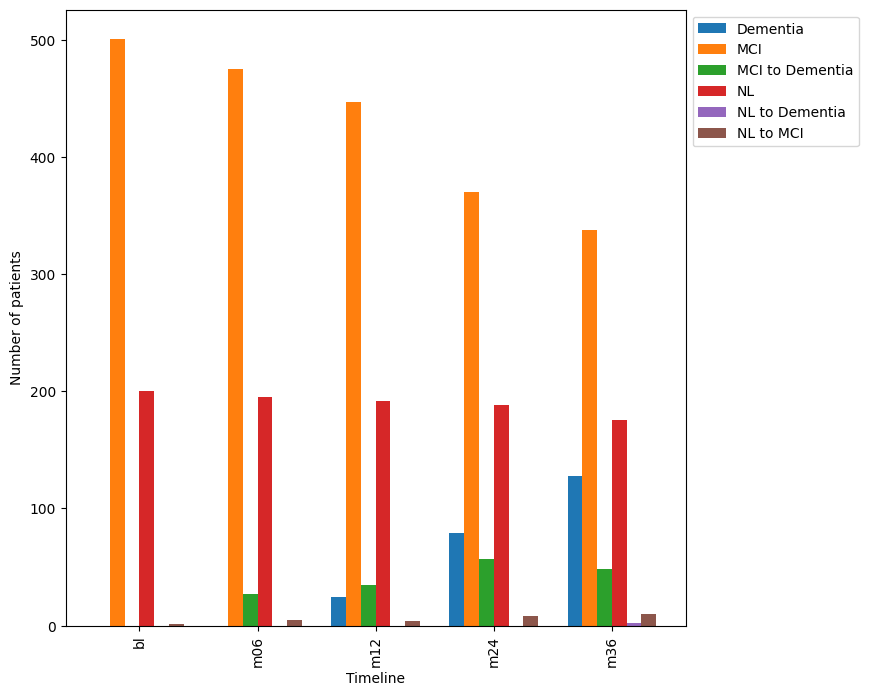

In [100]:

sns.reset_orig()
ax = dx_vc.iloc[:,:-1].plot.bar(figsize=(8, 8), width=0.75)

plt.xlabel('Timeline')
plt.ylabel('Number of patients')
# plt.title('Rainfall Days per Month by Year')
# plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
# plt.grid(True)
plt.show()


In [101]:
df_filt['DX'] = df_filt['DX'].map({
    'NL': 'NL',
    'MCI': 'MCI',
    'NL to MCI': 'MCI',
    'MCI to Dementia': 'Dementia',
    'Dementia': 'Dementia',
    'NL to Dementia': 'Dementia'
})

In [102]:
df_filt['DX'].unique()

array(['NL', 'MCI', 'Dementia'], dtype=object)

In [103]:
dx_vc = df_filt.groupby('VISCODE')['DX'].value_counts(dropna=False)

dx_vc = dx_vc.reset_index()
dx_vc = dx_vc.pivot(index='VISCODE', columns='DX', values='count')
dx_vc['Total'] = dx_vc.sum(axis=1)
dx_vc.fillna(0)

DX,Dementia,MCI,NL,Total
VISCODE,,,,
bl,0.0,502.0,200.0,702.0
m06,27.0,480.0,195.0,702.0
m12,59.0,451.0,192.0,702.0
m24,136.0,378.0,188.0,702.0
m36,178.0,348.0,176.0,702.0


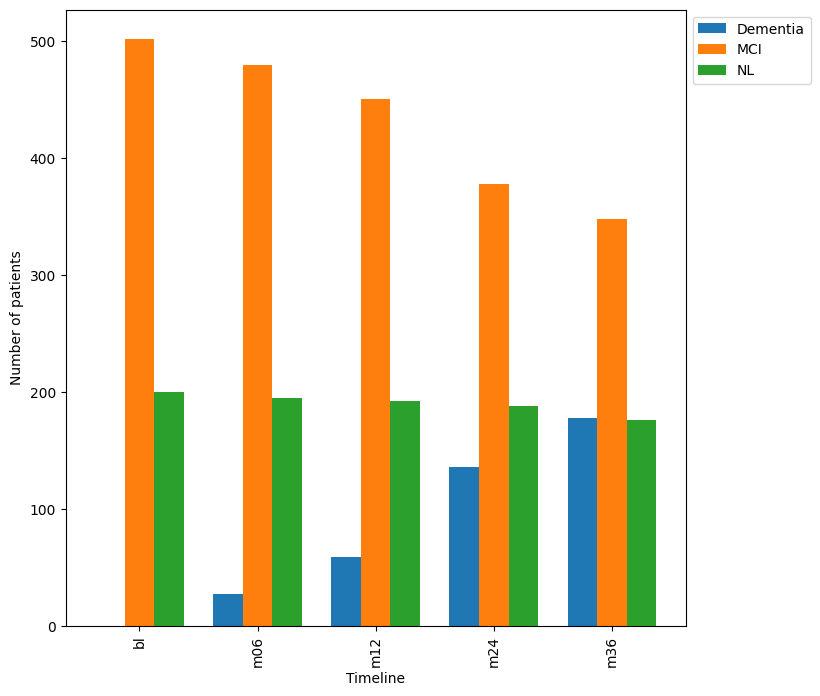

In [104]:

sns.reset_orig()
ax = dx_vc.iloc[:,:-1].plot.bar(figsize=(8, 8), width=0.75)

plt.xlabel('Timeline')
plt.ylabel('Number of patients')
# plt.title('Rainfall Days per Month by Year')
# plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
# plt.grid(True)
plt.show()


In [105]:
df_filt['VISCODE'].value_counts()

VISCODE
bl     702
m06    702
m12    702
m24    702
m36    702
Name: count, dtype: int64

## Imputation

In [106]:
df_filt_all_code['VISCODE'].value_counts()

VISCODE
bl     749
m06    749
m12    749
m24    749
m36    749
Name: count, dtype: int64

In [107]:
feature_idx_by_modality = {'Main cognitive tests': [22, 43],
                           'MRI ROI': [487, 833],
                           'MRI volumes': [48, 55],
                           'FDG PET ROI': [839, 1173],
                           'AV45 PET ROI': [1175, 1413],
                           'AV1451 PET ROI': [1417, 1657],
                           'DTI ROI': [1668, 1896],
                           'CSF biomarkers': [1903, 1906],
                           'Demo, APOE4 & others': [12, 22]}

dx_modality_dict = {}
adj = 1


for mode in feature_idx_by_modality:
    idx0 = feature_idx_by_modality[mode][0] - adj
    idx1 = feature_idx_by_modality[mode][1] - adj
    feats = df_filt_all_code.iloc[:, idx0:idx1]
    if mode == 'Demographics, APOE4 \nallele and others':
        feats = feats.replace('/', 
                                '', regex=True).replace(' ',
                                '', regex=True).replace('',
                                np.nan, regex=True).replace(-4,
                                np.nan, regex=True)
    elif mode == 'CSF biomarkers':
        feats = feats.replace(r'^\s*$',
                                np.nan, regex=True).replace('<',
                                '', regex=True).replace('>', 
                                '', regex=True).replace(-4,
                                np.nan, regex=True)
    else:
        feats = feats.replace('', 
                                np.nan, regex=True).replace(' ',
                                np.nan, regex=True).replace(-4,
                                np.nan, regex=True)

    dx_modality_dict[mode] = feats

/tmp/ipykernel_11352/2051822230.py:33: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [108]:
list(dx_modality_dict['MRI volumes'].columns)

['Ventricles',
 'Hippocampus',
 'WholeBrain',
 'Entorhinal',
 'Fusiform',
 'MidTemp',
 'ICV']

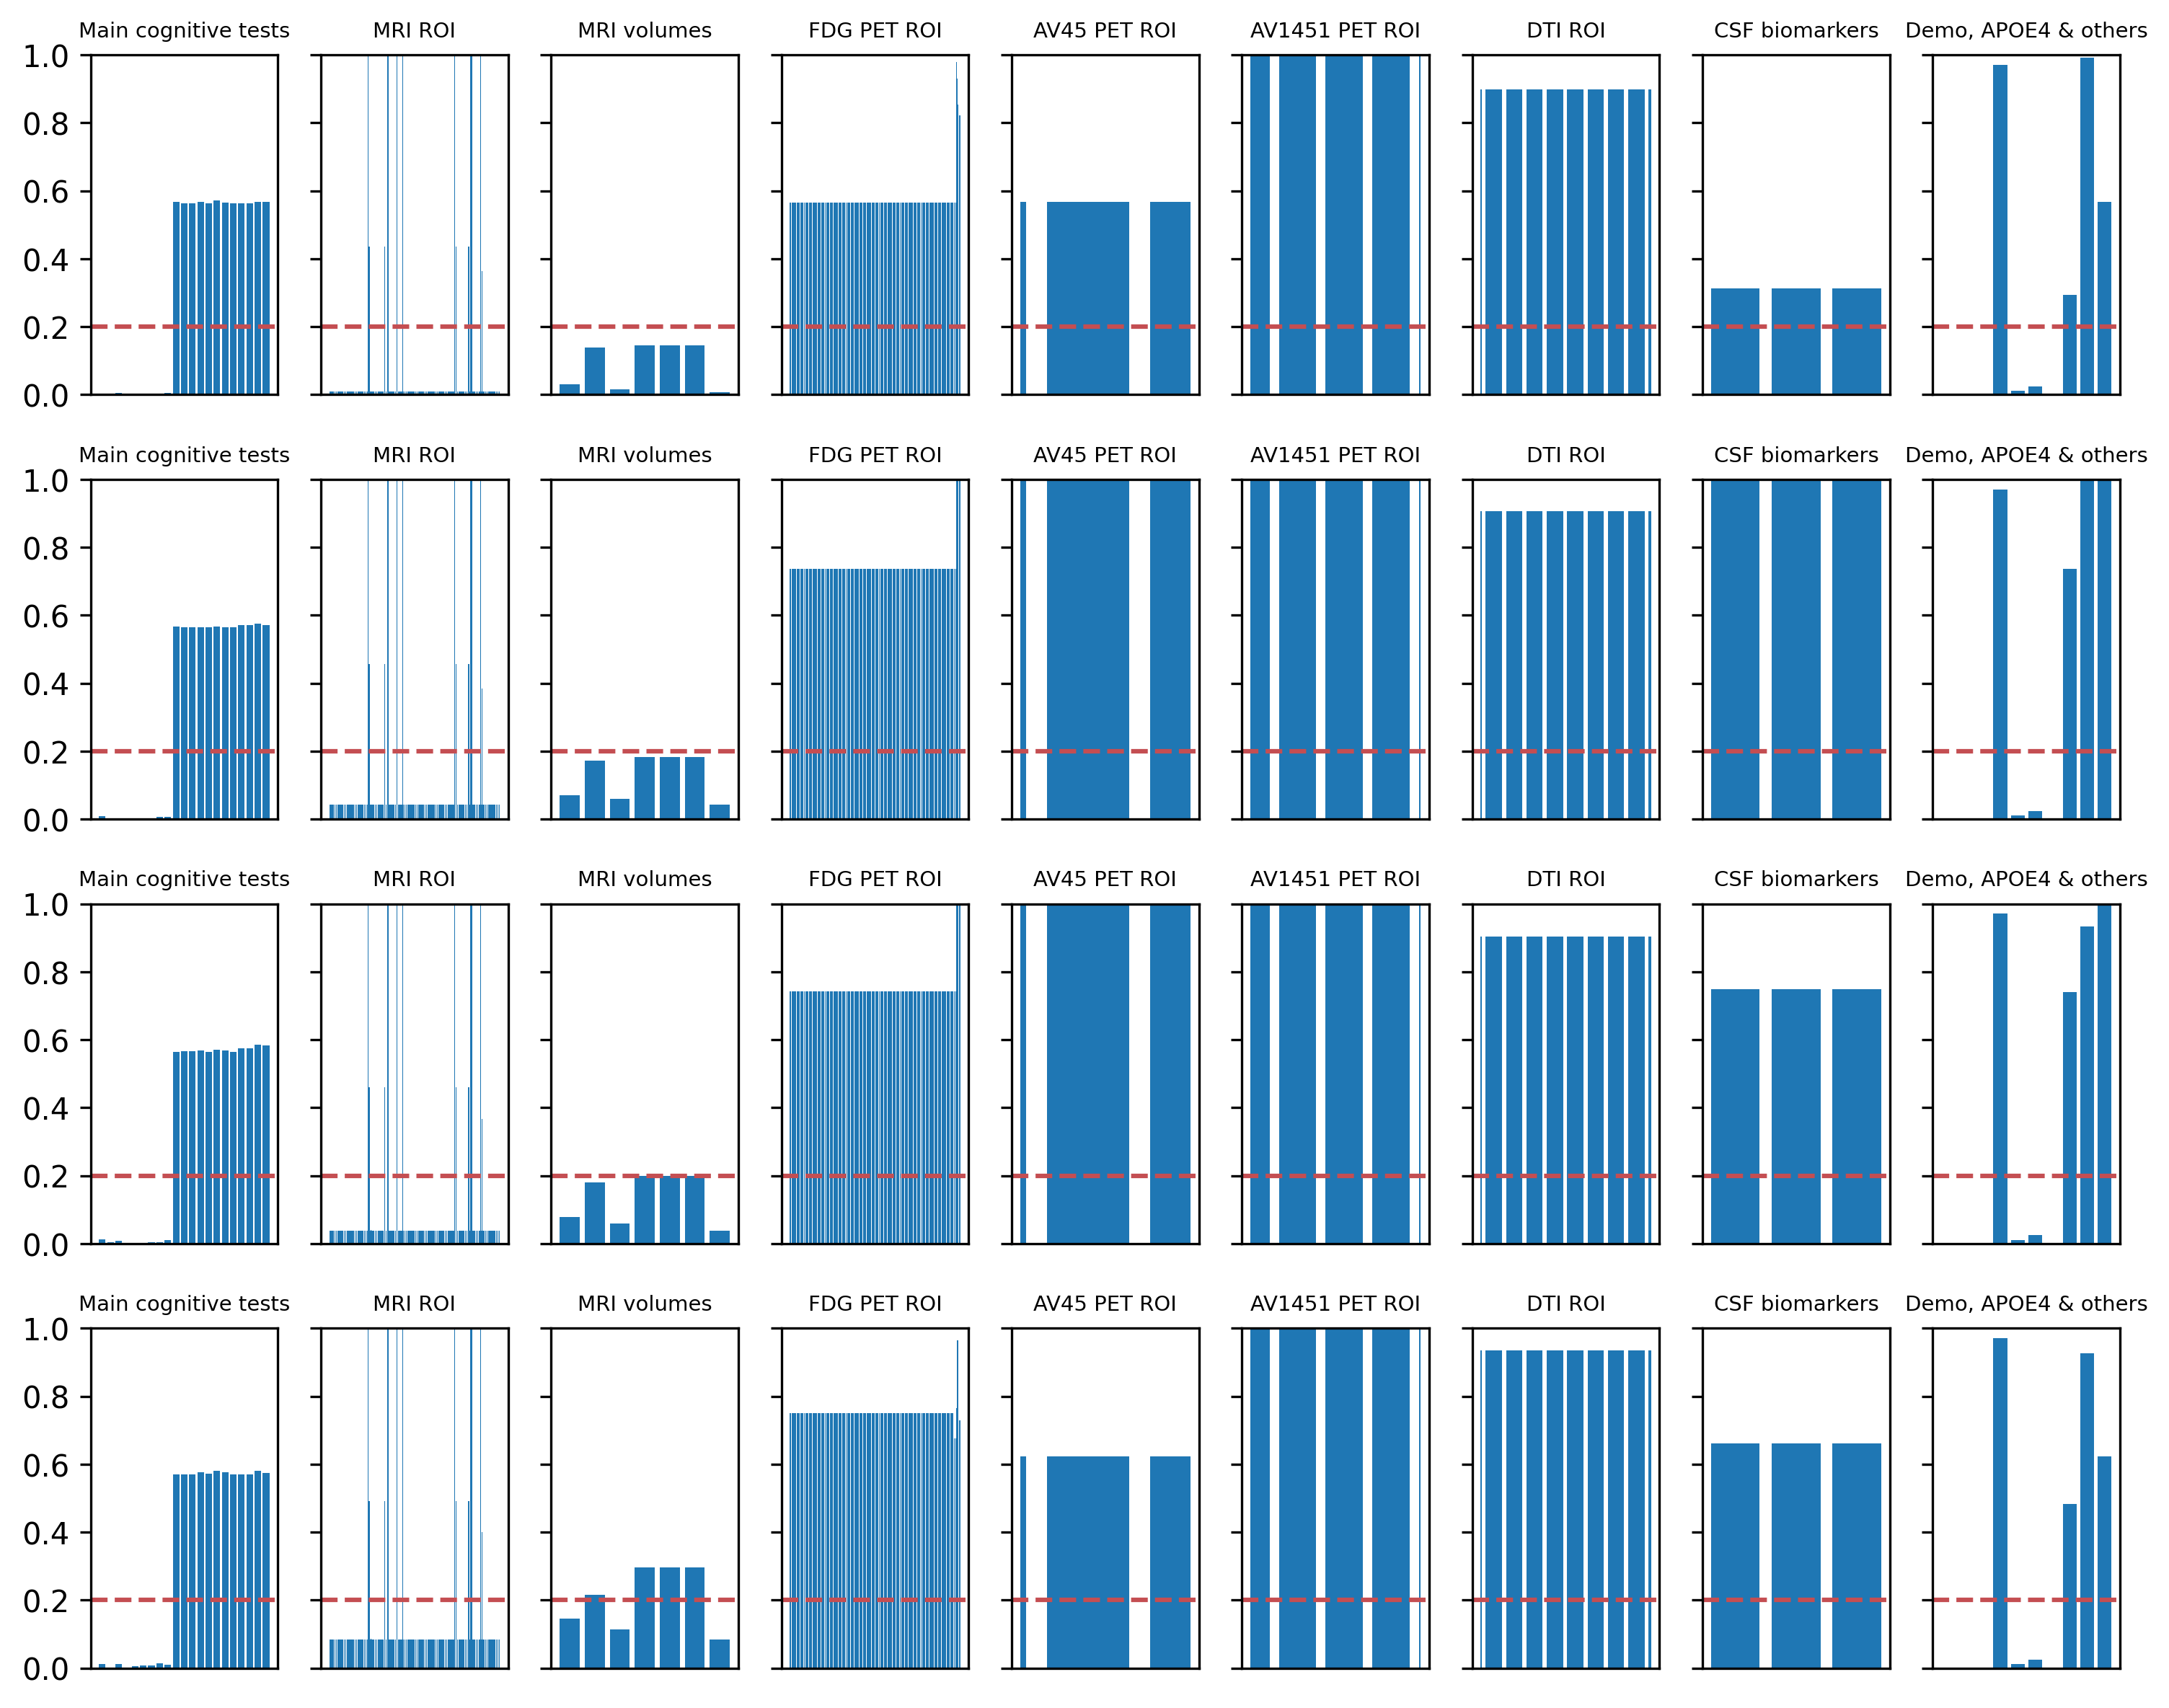

In [109]:
sns.reset_defaults()

missing_thresh = 0.3
chosen_order = chosen_order[:-1]
# temp_df= copy.deepcopy(dx_modality_dict)

missing_values = pd.DataFrame(columns=chosen_order)
fig, axes = plt.subplots(len(chosen_order), 9, figsize=(10,8), dpi=300, sharey=True)
# fig, axes = plt.subplots(len(chosen_order), 1, figsize=(8,8), dpi=300, sharey=True)
axCount = 0
for k in range(len(chosen_order)):
    te = df_filt_all_code[df_filt_all_code['VISCODE']==chosen_order[k]].index
    # data = data_[data_.index.isin(te)]
    missing_modes = []
    missing_modes = np.array(missing_modes)
    for i, mode in enumerate(dx_modality_dict):
    # for i, mode in enumerate(['MRI volumes']):
        data = copy.deepcopy(dx_modality_dict[mode])
        data = data[data.index.isin(te)]
        missing_array = np.zeros(data.shape[1])
        for j in range(data.shape[1]):
            # missing_array[j] = data.shape[0] - data.iloc[:, j].isnull().sum()
            # missing_array[j] = 1 - data.iloc[:, j].isnull().sum()/data.shape[0]
            missing_array[j] = data.iloc[:, j].isnull().sum()/data.shape[0]
            # missing_array[j] = data.iloc[:, j].isnull().sum()
            # temp_df
        #['FDG'].isnull().sum()
        # axes.flat[i].set_ylim([0, 1])
        axes.flat[axCount].set_xticks([])
        axes.flat[axCount].bar(range(data.shape[1]), missing_array)
        axes.flat[axCount].set_title(mode.replace('_', ' '))
        axes.flat[axCount].title.set_size(7)
        # axes.flat[axCount].axhline(y=data.shape[0]*missing_thresh, color='r', linestyle='--')
        axes.flat[axCount].axhline(y=missing_thresh, color='r', linestyle='--')
        # axes.flat[axCount].axhline(y=0.5, color='y', linestyle='--')
        missing_modes = np.concatenate([missing_modes, missing_array])
        axCount+=1
    missing_values[chosen_order[k]] = missing_modes
    
# fig.suptitle(f'Feature availability proportion for {dx} baseline patients at --- {custom_order[k]}')
# plt.ylabel
# for ax in range(len(axes)):
#     axes[ax].set_ylabel(chosen_order[ax])

plt.tight_layout()
# fig.text(0.5, 0, 'Feature')
# fig.text(0, 0.5, 'Proportion of data missing', va='center', rotation='vertical')

# axes.set_xticks(np.arange(0, 7, 1))
# axes.set_xticklabels(list(dx_modality_dict['MRI volumes'].columns))
# plt.setp(axes.get_xticklabels(), rotation=70)
# fig.supxlabel('Common X Label', fontsize=12)
plt.ylim([0,1])
plt.show()

In [74]:
missing_values

,bl,m06,m12,m24
0,0.000000,0.009346,0.012016,0.012016
1,0.001335,0.000000,0.002670,0.001335
2,0.004005,0.002670,0.008011,0.010681
3,0.000000,0.000000,0.000000,0.001335
4,0.000000,0.001335,0.001335,0.005340
...,...,...,...,...
1422,0.024032,0.024032,0.024032,0.024032
1423,0.000000,0.000000,0.000000,0.000000
1424,0.293725,0.736983,0.740988,0.481976
1425,0.991989,1.000000,0.933244,0.925234


In [75]:
# ((1-missing_values)>0.43000).sum(axis=0)
(missing_values>0.2000).sum(axis=0)

bl     1092
m06    1092
m12    1092
m24    1096
dtype: int64

In [76]:
available_feat = pd.DataFrame(columns=chosen_order+['threshold'])
thresholds = np.arange(0,1,0.01)
thresholds[0] = 0.00000
# thresholds = np.append(-0.5, thresholds)
for i in thresholds:
    temp_feat = ((1-missing_values)>i).sum(axis=0)
    temp_feat['threshold'] = i
    available_feat.loc[len(available_feat.index)] = temp_feat
    # missing_feat.append(temp_feat)

In [77]:
# available_feat[available_feat['threshold'] == 0.6]
available_feat.iloc[20:30, :]

,bl,m06,m12,m24,threshold
20,930.0,690.0,693.0,934.0,0.20
21,930.0,690.0,693.0,934.0,0.21
22,930.0,690.0,693.0,934.0,0.22
23,930.0,690.0,693.0,934.0,0.23
24,930.0,690.0,693.0,932.0,0.24
25,930.0,690.0,693.0,612.0,0.25
26,930.0,690.0,362.0,612.0,0.26
27,930.0,362.0,362.0,612.0,0.27
28,930.0,362.0,362.0,610.0,0.28
29,930.0,362.0,362.0,609.0,0.29


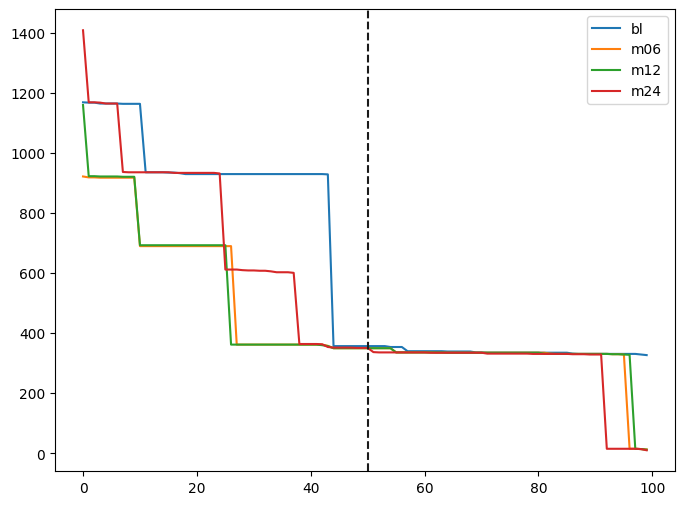

In [78]:
# missing_feat.iloc[:, :-1].plot()
# sns.reset_orig()
ax = available_feat.iloc[:,:-1].plot(figsize=(8, 6))

xt = list(round(available_feat['threshold'], 2))
# ax.set_xticks(range(len(xt)))
# ax.set_xticklabels(xt, rotation=90)
# ax.axvline(66, color='y', linestyle='--')
ax.axvline(50, color='k', linestyle='--')

# plt.xlabel('Timeline')
# plt.ylabel('Number of patients')
# plt.title('Number of features in each visit with more than percentage of available patient data')
# # plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
# plt.grid(True)
plt.show()


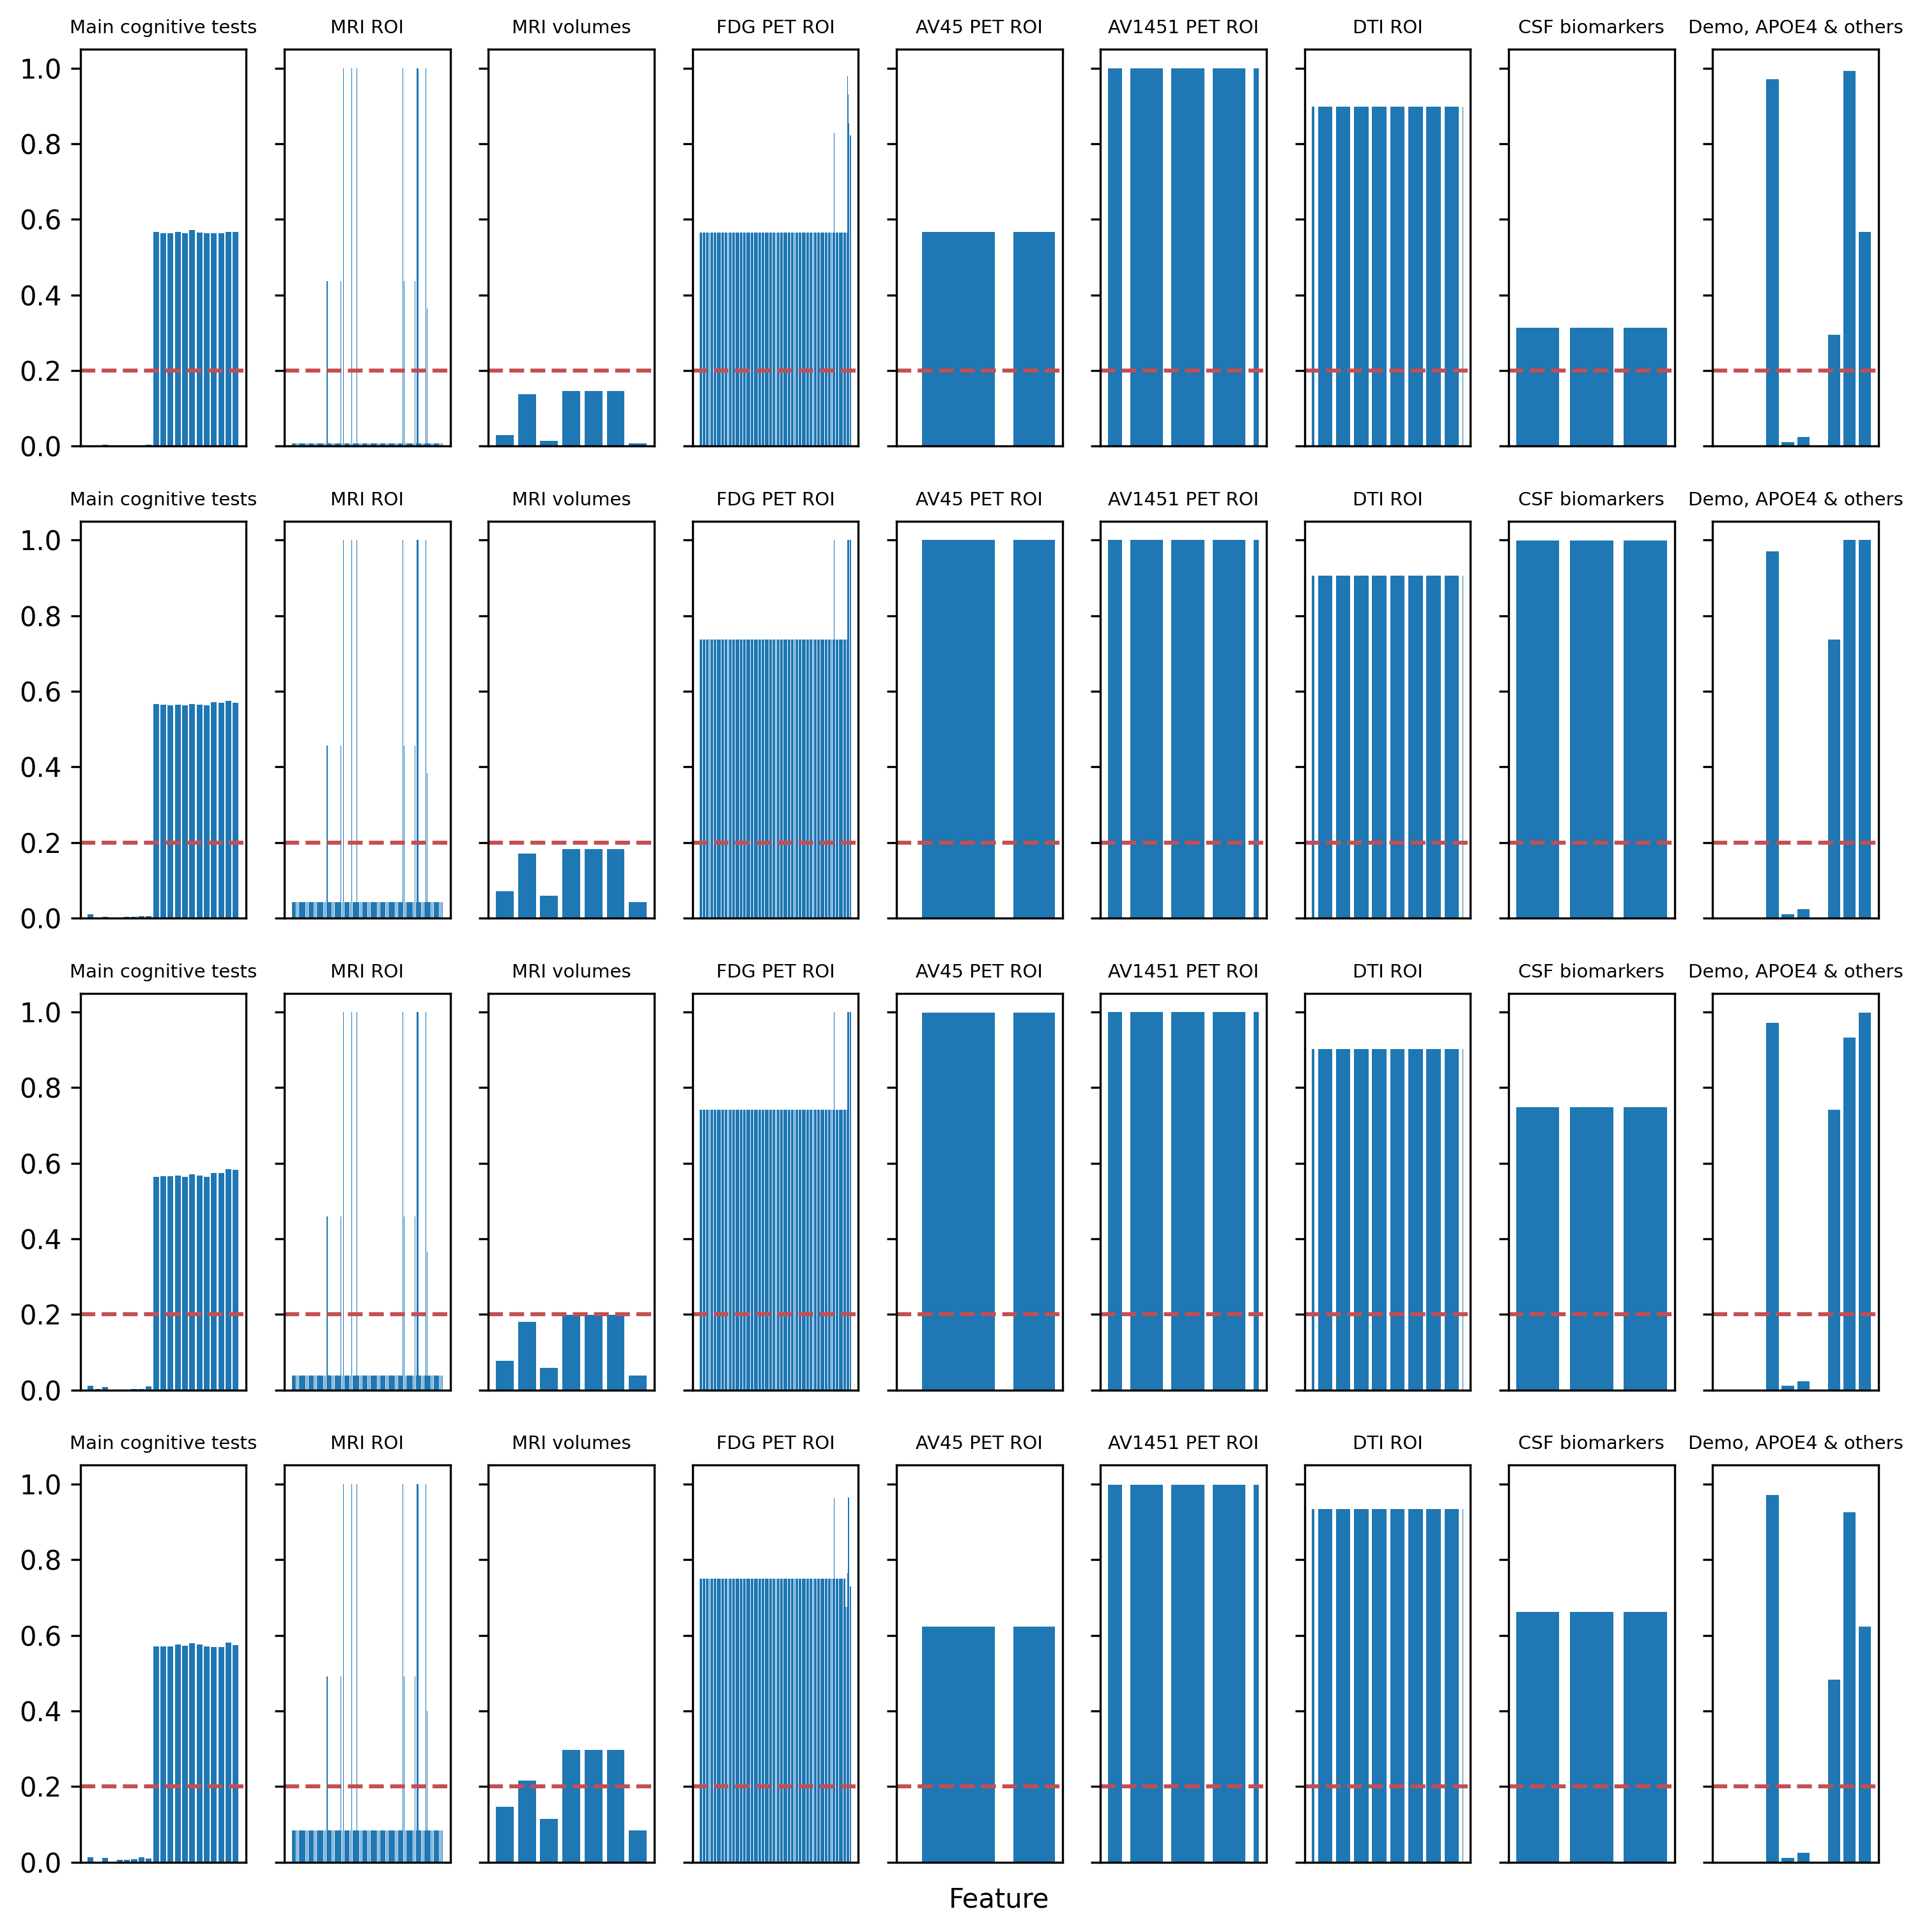

In [79]:
sns.reset_defaults()

missing_thresh = 0.3

# temp_df= copy.deepcopy(dx_modality_dict)

missing_values = pd.DataFrame(columns=chosen_order)
fig, axes = plt.subplots(len(chosen_order), 9, figsize=(10,10), dpi=300, sharey=True)
axCount = 0

df_filt_miss = copy.deepcopy(df_filt_all_code)
dx_modality_dict_miss = copy.deepcopy(dx_modality_dict)
# df_filt_miss = df_filt
# dx_modality_dict_miss = dx_modality_dict

for k in range(len(chosen_order)):
    # print(chosen_order[k])
    te = df_filt_all_code[df_filt_all_code['VISCODE']==chosen_order[k]].index
    # data = data_[data_.index.isin(te)]
    missing_modes = []
    missing_modes = np.array(missing_modes)
    for i, mode in enumerate(dx_modality_dict):
        # print(mode)
        data = copy.deepcopy(dx_modality_dict[mode])
        data = data[data.index.isin(te)]
        data_c = list(data.columns)
        missing_array = np.zeros(data.shape[1])
        for j in range(data.shape[1]):
            # missing_array[j] = data.shape[0] - data.iloc[:, j].isnull().sum()
            # missing_array[j] = 1 - data.iloc[:, j].isnull().sum()/data.shape[0]
            missing_array[j] = data.iloc[:, j].isnull().sum()/data.shape[0]
            # missing_array[j] = data.iloc[:, j].isnull().sum()
            temp = data.iloc[:, j].isnull().sum()
            if temp > (data.shape[0]*missing_thresh):
                # data.drop(data_c[j], axis=1, inplace=True)
                try:
                    dx_modality_dict_miss[mode].drop(data_c[j], axis=1, inplace=True)
                except KeyError:
                    continue

                try:
                    df_filt_miss.drop(data_c[j], inplace=True)
                except KeyError:
                    continue
            # temp_df
        #['FDG'].isnull().sum()
        # axes.flat[i].set_ylim([0, 1])
        axes.flat[axCount].set_xticks([])
        axes.flat[axCount].bar(range(data.shape[1]), missing_array)
        axes.flat[axCount].set_title(mode.replace('_', ' '))
        axes.flat[axCount].title.set_size(7)
        # axes.flat[axCount].axhline(y=data.shape[0]*missing_thresh, color='r', linestyle='--')
        axes.flat[axCount].axhline(y=missing_thresh, color='r', linestyle='--')
        missing_modes = np.concatenate([missing_modes, missing_array])
        axCount+=1
    missing_values[chosen_order[k]] = missing_modes
    
# fig.suptitle(f'Feature availability proportion for {dx} baseline patients at --- {custom_order[k]}')
# plt.ylabel
# for ax in axes:
#     ax.set_xticks([])

plt.tight_layout()
fig.text(0.5, 0, 'Feature')
# fig.text(0, 0.5, 'Proportion of data missing', va='center', rotation='vertical')
plt.show()

In [80]:
#--------------- Filtering out empty modes ---------------#
dx_modality_dict_miss_1 = copy.deepcopy(dx_modality_dict_miss)
for i in df_filt_miss.groupby('VISCODE'):
    print("Visit: ", i[0])
    temp_ind = list(i[1].index)
    for j in dx_modality_dict_miss:
        current_mode = dx_modality_dict_miss[j]
        current_mode = current_mode[current_mode.index.isin(temp_ind)]
        if current_mode.shape[1] == 0:
            print("Empty mode: ", j)
            try:
                del dx_modality_dict_miss_1[j]
            except KeyError:
                continue

Visit:  bl
Empty mode:  FDG PET ROI
Empty mode:  AV45 PET ROI
Empty mode:  AV1451 PET ROI
Empty mode:  DTI ROI
Empty mode:  CSF biomarkers
Visit:  m06
Empty mode:  FDG PET ROI
Empty mode:  AV45 PET ROI
Empty mode:  AV1451 PET ROI
Empty mode:  DTI ROI
Empty mode:  CSF biomarkers
Visit:  m12
Empty mode:  FDG PET ROI
Empty mode:  AV45 PET ROI
Empty mode:  AV1451 PET ROI
Empty mode:  DTI ROI
Empty mode:  CSF biomarkers
Visit:  m24
Empty mode:  FDG PET ROI
Empty mode:  AV45 PET ROI
Empty mode:  AV1451 PET ROI
Empty mode:  DTI ROI
Empty mode:  CSF biomarkers
Visit:  m36
Empty mode:  FDG PET ROI
Empty mode:  AV45 PET ROI
Empty mode:  AV1451 PET ROI
Empty mode:  DTI ROI
Empty mode:  CSF biomarkers


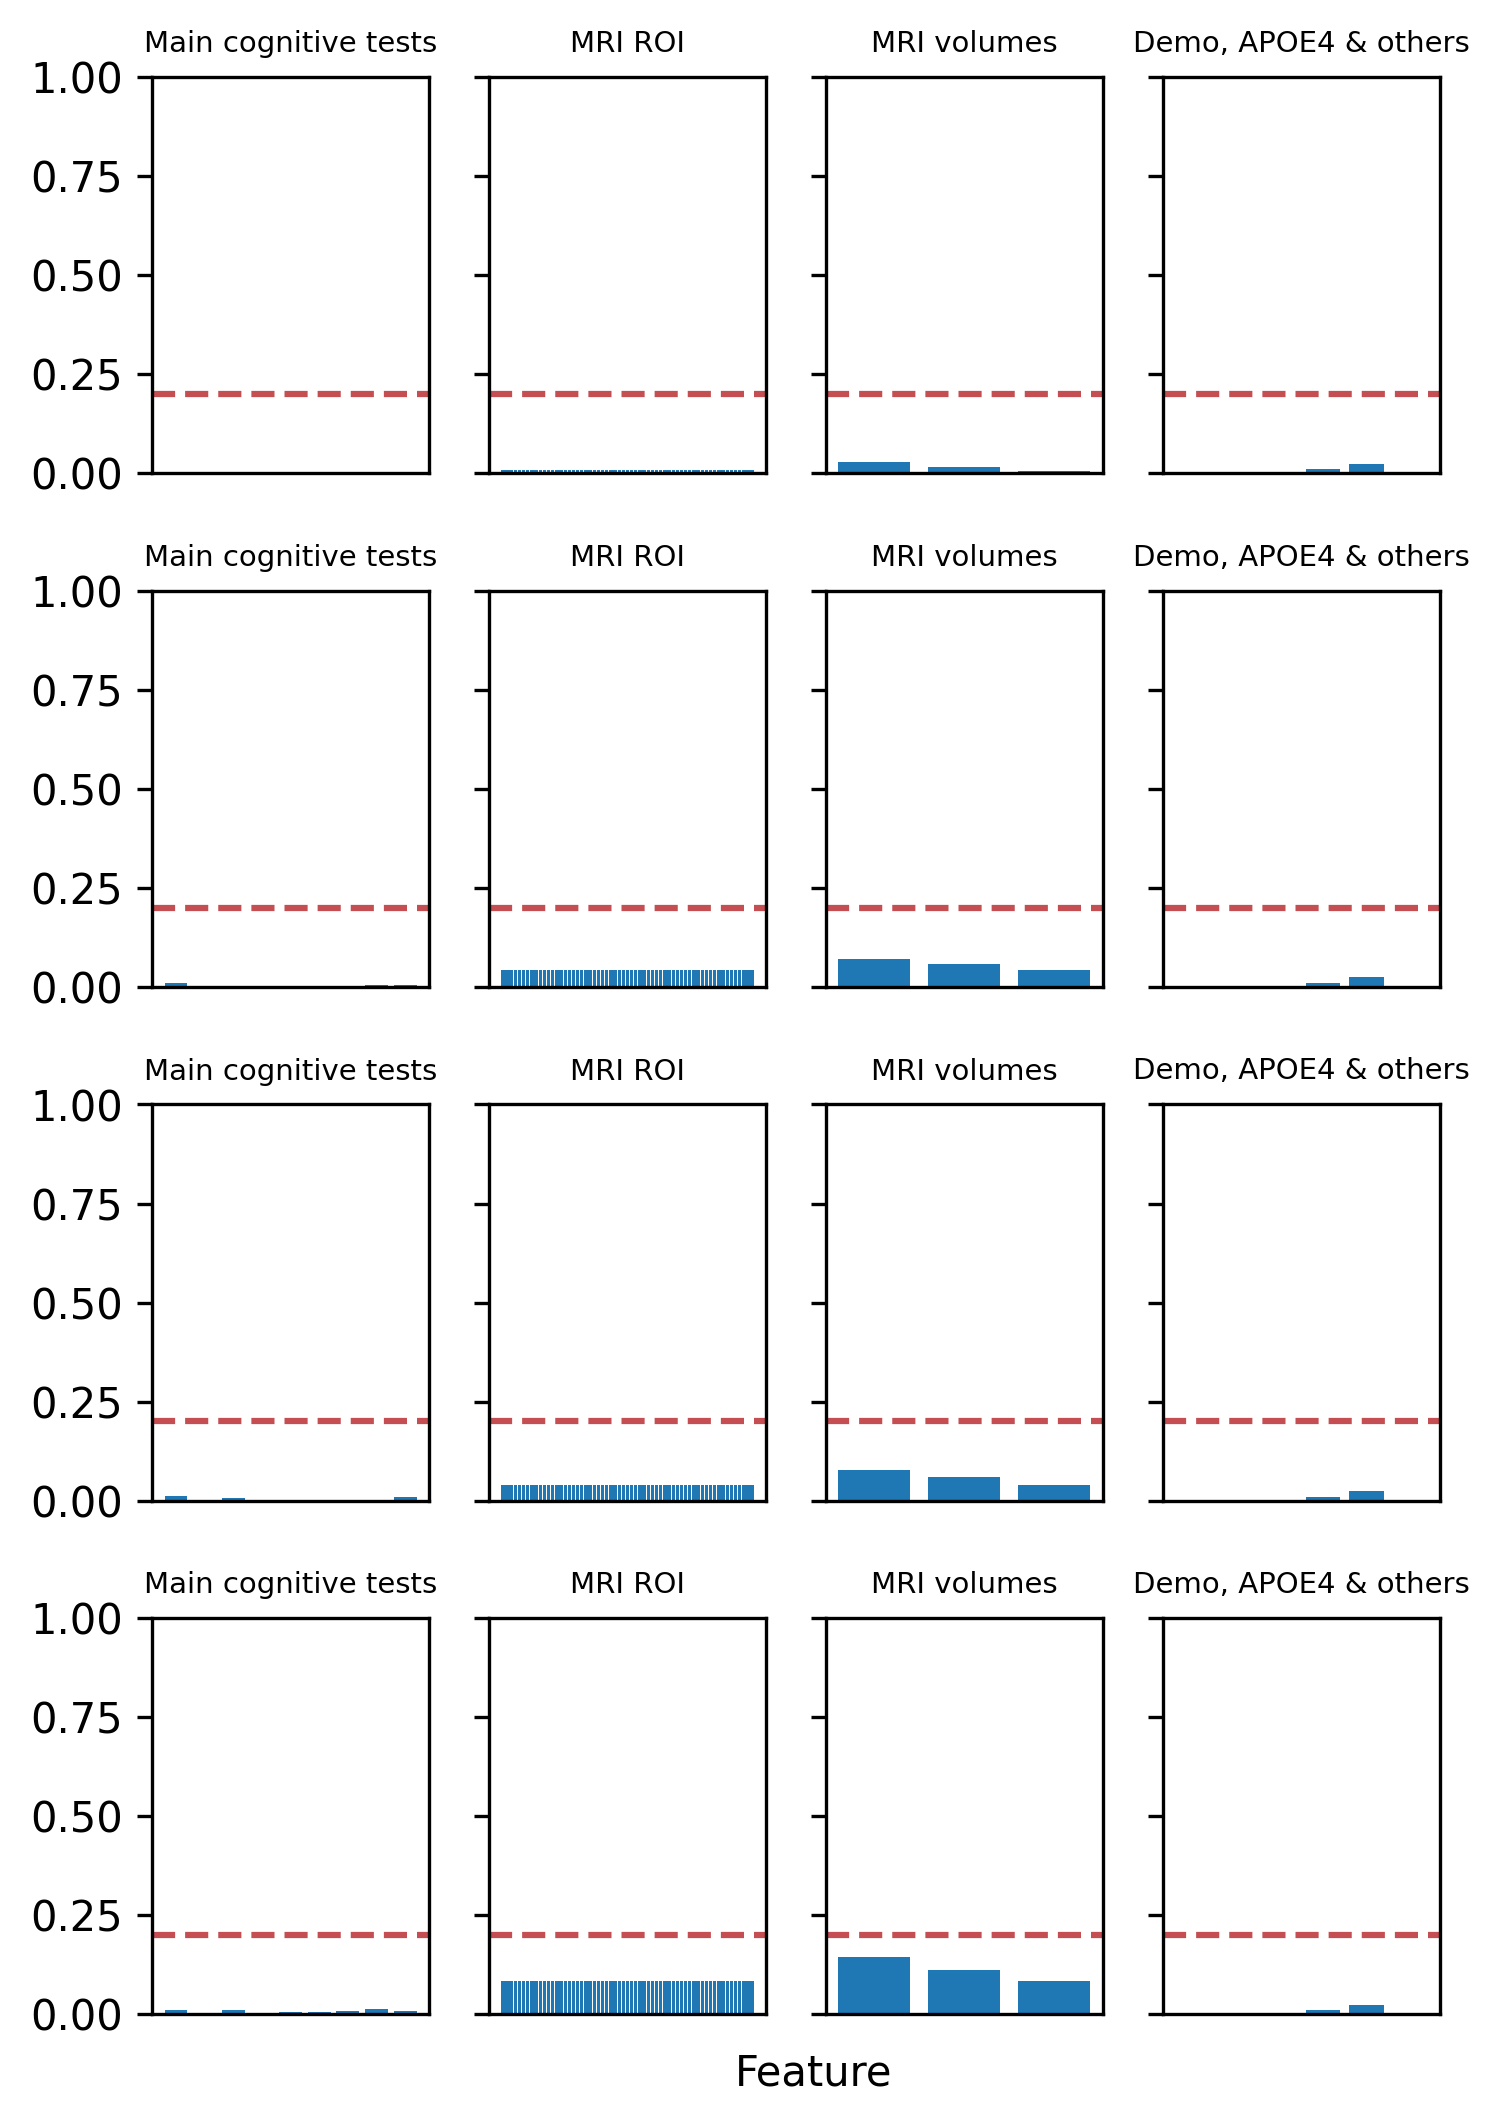

In [81]:
sns.reset_defaults()

missing_thresh = 0.3

# temp_df= copy.deepcopy(dx_modality_dict)

missing_values = pd.DataFrame(columns=chosen_order)
fig, axes = plt.subplots(len(chosen_order), 4, figsize=(5,7), dpi=300, sharey=True)
axCount = 0

# df_filt_miss = copy.deepcopy(df_filt)
# dx_modality_dict_miss = copy.deepcopy(dx_modality_dict)
# df_filt_miss = df_filt
# dx_modality_dict_miss = dx_modality_dict

for k in range(len(chosen_order)):
    # print(chosen_order[k])
    te = df_filt_miss[df_filt_miss['VISCODE']==chosen_order[k]].index
    # data = data_[data_.index.isin(te)]
    missing_modes = []
    missing_modes = np.array(missing_modes)
    for i, mode in enumerate(dx_modality_dict_miss_1):
        # print(mode)
        data = copy.deepcopy(dx_modality_dict_miss_1[mode])
        data = data[data.index.isin(te)]
        data_c = list(data.columns)
        missing_array = np.zeros(data.shape[1])
        for j in range(data.shape[1]):
            # missing_array[j] = data.shape[0] - data.iloc[:, j].isnull().sum()
            # missing_array[j] = 1 - data.iloc[:, j].isnull().sum()/data.shape[0]
            missing_array[j] = data.iloc[:, j].isnull().sum()/data.shape[0]
            # missing_array[j] = data.iloc[:, j].isnull().sum()
            # if missing_array[j] > (data.shape[0]*missing_thresh):
            #     # data.drop(data_c[j], axis=1, inplace=True)
            #     try:
            #         dx_modality_dict_miss[mode].drop(data_c[j], axis=1, inplace=True)
            #     except KeyError:
            #         continue

            #     try:
            #         df_filt_miss.drop(data_c[j], inplace=True)
            #     except KeyError:
            #         continue
            # temp_df
        #['FDG'].isnull().sum()
        # axes.flat[i].set_ylim([0, data.shape[0]])
        axes.flat[i].set_ylim([0, 1])
        axes.flat[axCount].set_xticks([])
        axes.flat[axCount].bar(range(data.shape[1]), missing_array)
        axes.flat[axCount].set_title(mode.replace('_', ' '))
        axes.flat[axCount].title.set_size(7)
        # axes.flat[axCount].axhline(y=data.shape[0]*missing_thresh, color='r', linestyle='--')
        axes.flat[axCount].axhline(y=missing_thresh, color='r', linestyle='--')
        missing_modes = np.concatenate([missing_modes, missing_array])
        axCount+=1
    missing_values[chosen_order[k]] = missing_modes
    
# fig.suptitle(f'Feature availability proportion for {dx} baseline patients at --- {custom_order[k]}')
# plt.ylabel
# for ax in axes:
#     ax.set_xticks([])

plt.tight_layout()
fig.text(0.5, 0, 'Feature')
# fig.text(0, 0.5, 'Amount of data missing', va='center', rotation='vertical')
plt.show()

In [82]:
dx_modality_dict_miss_1.keys()

dict_keys(['Main cognitive tests', 'MRI ROI', 'MRI volumes', 'Demo, APOE4 & others'])

In [83]:
# --- Part 4.5: Map MRI names to dictionary names --- #

filepath_dict = f'{cwd}/tadpole_data/TADPOLE_D1_D2_Dict.csv'
tadpole_dict = pd.read_csv(filepath_dict)

for feat in dx_modality_dict_miss_1['MRI ROI']:
    dict_row = tadpole_dict[tadpole_dict['FLDNAME'] == feat]
    text_name = list(dict_row['TEXT'])[0]
    dx_modality_dict_miss_1['MRI ROI'].rename(columns={feat: text_name}, inplace=True)

In [84]:
mri_mode_list = ['Volume (WM Parcellation)', 'Volume (Cortical Parcellation)',
                'Surface Area', 'Cortical Thickness Average', 
                'Cortical Thickness Standard Deviation']

for new_mode in mri_mode_list:
    dx_modality_dict_miss_1[f'MRI ROI: {new_mode}'] = dx_modality_dict_miss_1['MRI ROI'].filter(like=new_mode)
del dx_modality_dict_miss_1['MRI ROI']

In [85]:
final_df_dict = {}
final_label_dict = {}
chosen_order.append('m36')
for k in range(len(chosen_order)):
    final_df_dict[chosen_order[k]] = {}
    
    print(chosen_order[k])
    te = df_filt_miss[df_filt_miss['VISCODE']==chosen_order[k]].index
    # temp = copy.deepcopy(df_filt_miss[df_filt_miss.index.isin(te)])
    final_label_dict[chosen_order[k]] = df_filt_miss[df_filt_miss['VISCODE']==chosen_order[k]]['DX']
    # missing_modes = []
    # missing_modes = np.array(missing_modes)
    for i, mode in enumerate(dx_modality_dict_miss_1):
        print(mode)
        data = copy.deepcopy(dx_modality_dict_miss_1[mode])
        final_df_dict[chosen_order[k]][mode] = data[data.index.isin(te)]
        print(final_df_dict[chosen_order[k]][mode].shape)
        # data_c = list(data.columns)
        # missing_array = np.zeros(data.shape[1])
        # for j in range(data.shape[1]):

bl
Main cognitive tests
(749, 9)
MRI volumes
(749, 3)
Demo, APOE4 & others
(749, 6)
MRI ROI: Volume (WM Parcellation)
(749, 40)
MRI ROI: Volume (Cortical Parcellation)
(749, 69)
MRI ROI: Surface Area
(749, 68)
MRI ROI: Cortical Thickness Average
(749, 68)
MRI ROI: Cortical Thickness Standard Deviation
(749, 68)
m06
Main cognitive tests
(749, 9)
MRI volumes
(749, 3)
Demo, APOE4 & others
(749, 6)
MRI ROI: Volume (WM Parcellation)
(749, 40)
MRI ROI: Volume (Cortical Parcellation)
(749, 69)
MRI ROI: Surface Area
(749, 68)
MRI ROI: Cortical Thickness Average
(749, 68)
MRI ROI: Cortical Thickness Standard Deviation
(749, 68)
m12
Main cognitive tests
(749, 9)
MRI volumes
(749, 3)
Demo, APOE4 & others
(749, 6)
MRI ROI: Volume (WM Parcellation)
(749, 40)
MRI ROI: Volume (Cortical Parcellation)
(749, 69)
MRI ROI: Surface Area
(749, 68)
MRI ROI: Cortical Thickness Average
(749, 68)
MRI ROI: Cortical Thickness Standard Deviation
(749, 68)
m24
Main cognitive tests
(749, 9)
MRI volumes
(749, 3)
Demo

In [86]:
te = df_filt_miss[df_filt_miss['VISCODE']==chosen_order[0]].index
te

Index([   10,    15,    28,    33,    36,    45,    53,    64,    71,    78,
       ...
       10415, 10419, 10453, 10465, 10484, 10546, 10616, 10657, 10685, 10791],
      dtype='int64', length=749)

In [87]:
print(final_df_dict.keys())
print(final_df_dict['bl'].keys())

dict_keys(['bl', 'm06', 'm12', 'm24', 'm36'])
dict_keys(['Main cognitive tests', 'MRI volumes', 'Demo, APOE4 & others', 'MRI ROI: Volume (WM Parcellation)', 'MRI ROI: Volume (Cortical Parcellation)', 'MRI ROI: Surface Area', 'MRI ROI: Cortical Thickness Average', 'MRI ROI: Cortical Thickness Standard Deviation'])


In [88]:
from sklearn import preprocessing
def encode_exclude_nan(mode):
 
    le = preprocessing.LabelEncoder()
    nanmap = mode.isnull()
    for c in mode.keys():
        le.fit(mode[c])
        mode[c] = le.transform(mode[c])
    mode[nanmap == True] = np.nan

    return mode

def other_process(other_mode):
    if 'APOE4' in other_mode.keys():
        one_hot = pd.get_dummies(other_mode, columns=['APOE4'])
    else:
        one_hot = other_mode
    encoded = encode_exclude_nan(one_hot)
    return encoded

for i in final_df_dict:
    final_df_dict[i]['Demo, APOE4 & others'] = other_process(final_df_dict[i]['Demo, APOE4 & others'])

# dx_modality_dict_miss_1['Demo, APOE4 & others'] = other_process(dx_modality_dict_miss_1['Demo, APOE4 & others'])

In [89]:
from sklearn.impute import KNNImputer
def impute_per_mode(train_dict, test_dict=None):
    if type(test_dict) == type(None):
        imputed_dict = {}
        for mode in train_dict:
            imputer = KNNImputer(missing_values=np.nan)
            #print(original_dict[mode])
            imputer = imputer.fit(train_dict[mode])
            imputed_dict[mode] = pd.DataFrame(imputer.transform(train_dict[mode]), columns=train_dict[mode].columns)
        return imputed_dict
    elif type(test_dict) != type(None):
        imputed_train_dict = {}
        imputed_test_dict = {}
        
        for mode in train_dict:
            #print(mode)
            imputer = KNNImputer(missing_values=np.nan)
            #print(original_dict[mode])
            imputer = imputer.fit(train_dict[mode])
            imputed_train_dict[mode] = imputer.transform(train_dict[mode])
            imputed_test_dict[mode] = imputer.transform(test_dict[mode])
        return imputed_train_dict, imputed_test_dict
    
def normalize_per_col(train_dict, test_dict=None):
    if type(test_dict) == type(None):
        mode_dict_norm= {}
        for m in train_dict:
            mode_dict_norm[m] = pd.DataFrame()
            for col in train_dict[m].columns:
                #print(mode_dict_feature_filtered_coldrop_train[m])
                dfmax = train_dict[m][col].max()
                dfmin = train_dict[m][col].min()
                norm_col_train = (train_dict[m][col] - dfmin) * 1.0 / (dfmax - dfmin)
                mode_dict_norm[m] = pd.concat([mode_dict_norm[m], norm_col_train], axis=1)
            # mode_dict_norm[m] = np.array(mode_dict_norm[m])
        return(mode_dict_norm)
    elif type(test_dict) != type(None):
        mode_dict_norm_train = {}
        mode_dict_norm_test = {}
        for m in train_dict:
            mode_dict_norm_train[m] = pd.DataFrame()
            mode_dict_norm_test[m] = pd.DataFrame()
            for col in range(train_dict[m].shape[1]):
                dfmax = train_dict[m][:, col].max()
                dfmin = train_dict[m][:, col].min()
                norm_col_train = pd.DataFrame((train_dict[m][:, col] - 
                                                    dfmin) * 1.0 / (dfmax+0.000000000000001 - dfmin))
                norm_col_test = pd.DataFrame((test_dict[m][:, col] - 
                                                    dfmin) * 1.0 / (dfmax+0.000000000000001 - dfmin))
                mode_dict_norm_train[m] = pd.concat([mode_dict_norm_train[m], pd.DataFrame(norm_col_train)], axis=1)
                mode_dict_norm_test[m] = pd.concat([mode_dict_norm_test[m], pd.DataFrame(norm_col_test)], axis=1)
            mode_dict_norm_test[m][mode_dict_norm_test[m] > 1] = 1
            mode_dict_norm_test[m][mode_dict_norm_test[m] < 0] = 0
            # mode_dict_norm_train[m] = np.array(mode_dict_norm_train[m])
            # mode_dict_norm_test[m] = np.array(mode_dict_norm_test[m])
        return(mode_dict_norm_train, mode_dict_norm_test)

In [90]:
df_dict = copy.deepcopy(final_df_dict)
for i in df_dict:
    df_dict[i] = impute_per_mode(df_dict[i])
    df_dict[i] = normalize_per_col(df_dict[i])

In [91]:
df_dict['bl'].keys()

dict_keys(['Main cognitive tests', 'MRI volumes', 'Demo, APOE4 & others', 'MRI ROI: Volume (WM Parcellation)', 'MRI ROI: Volume (Cortical Parcellation)', 'MRI ROI: Surface Area', 'MRI ROI: Cortical Thickness Average', 'MRI ROI: Cortical Thickness Standard Deviation'])

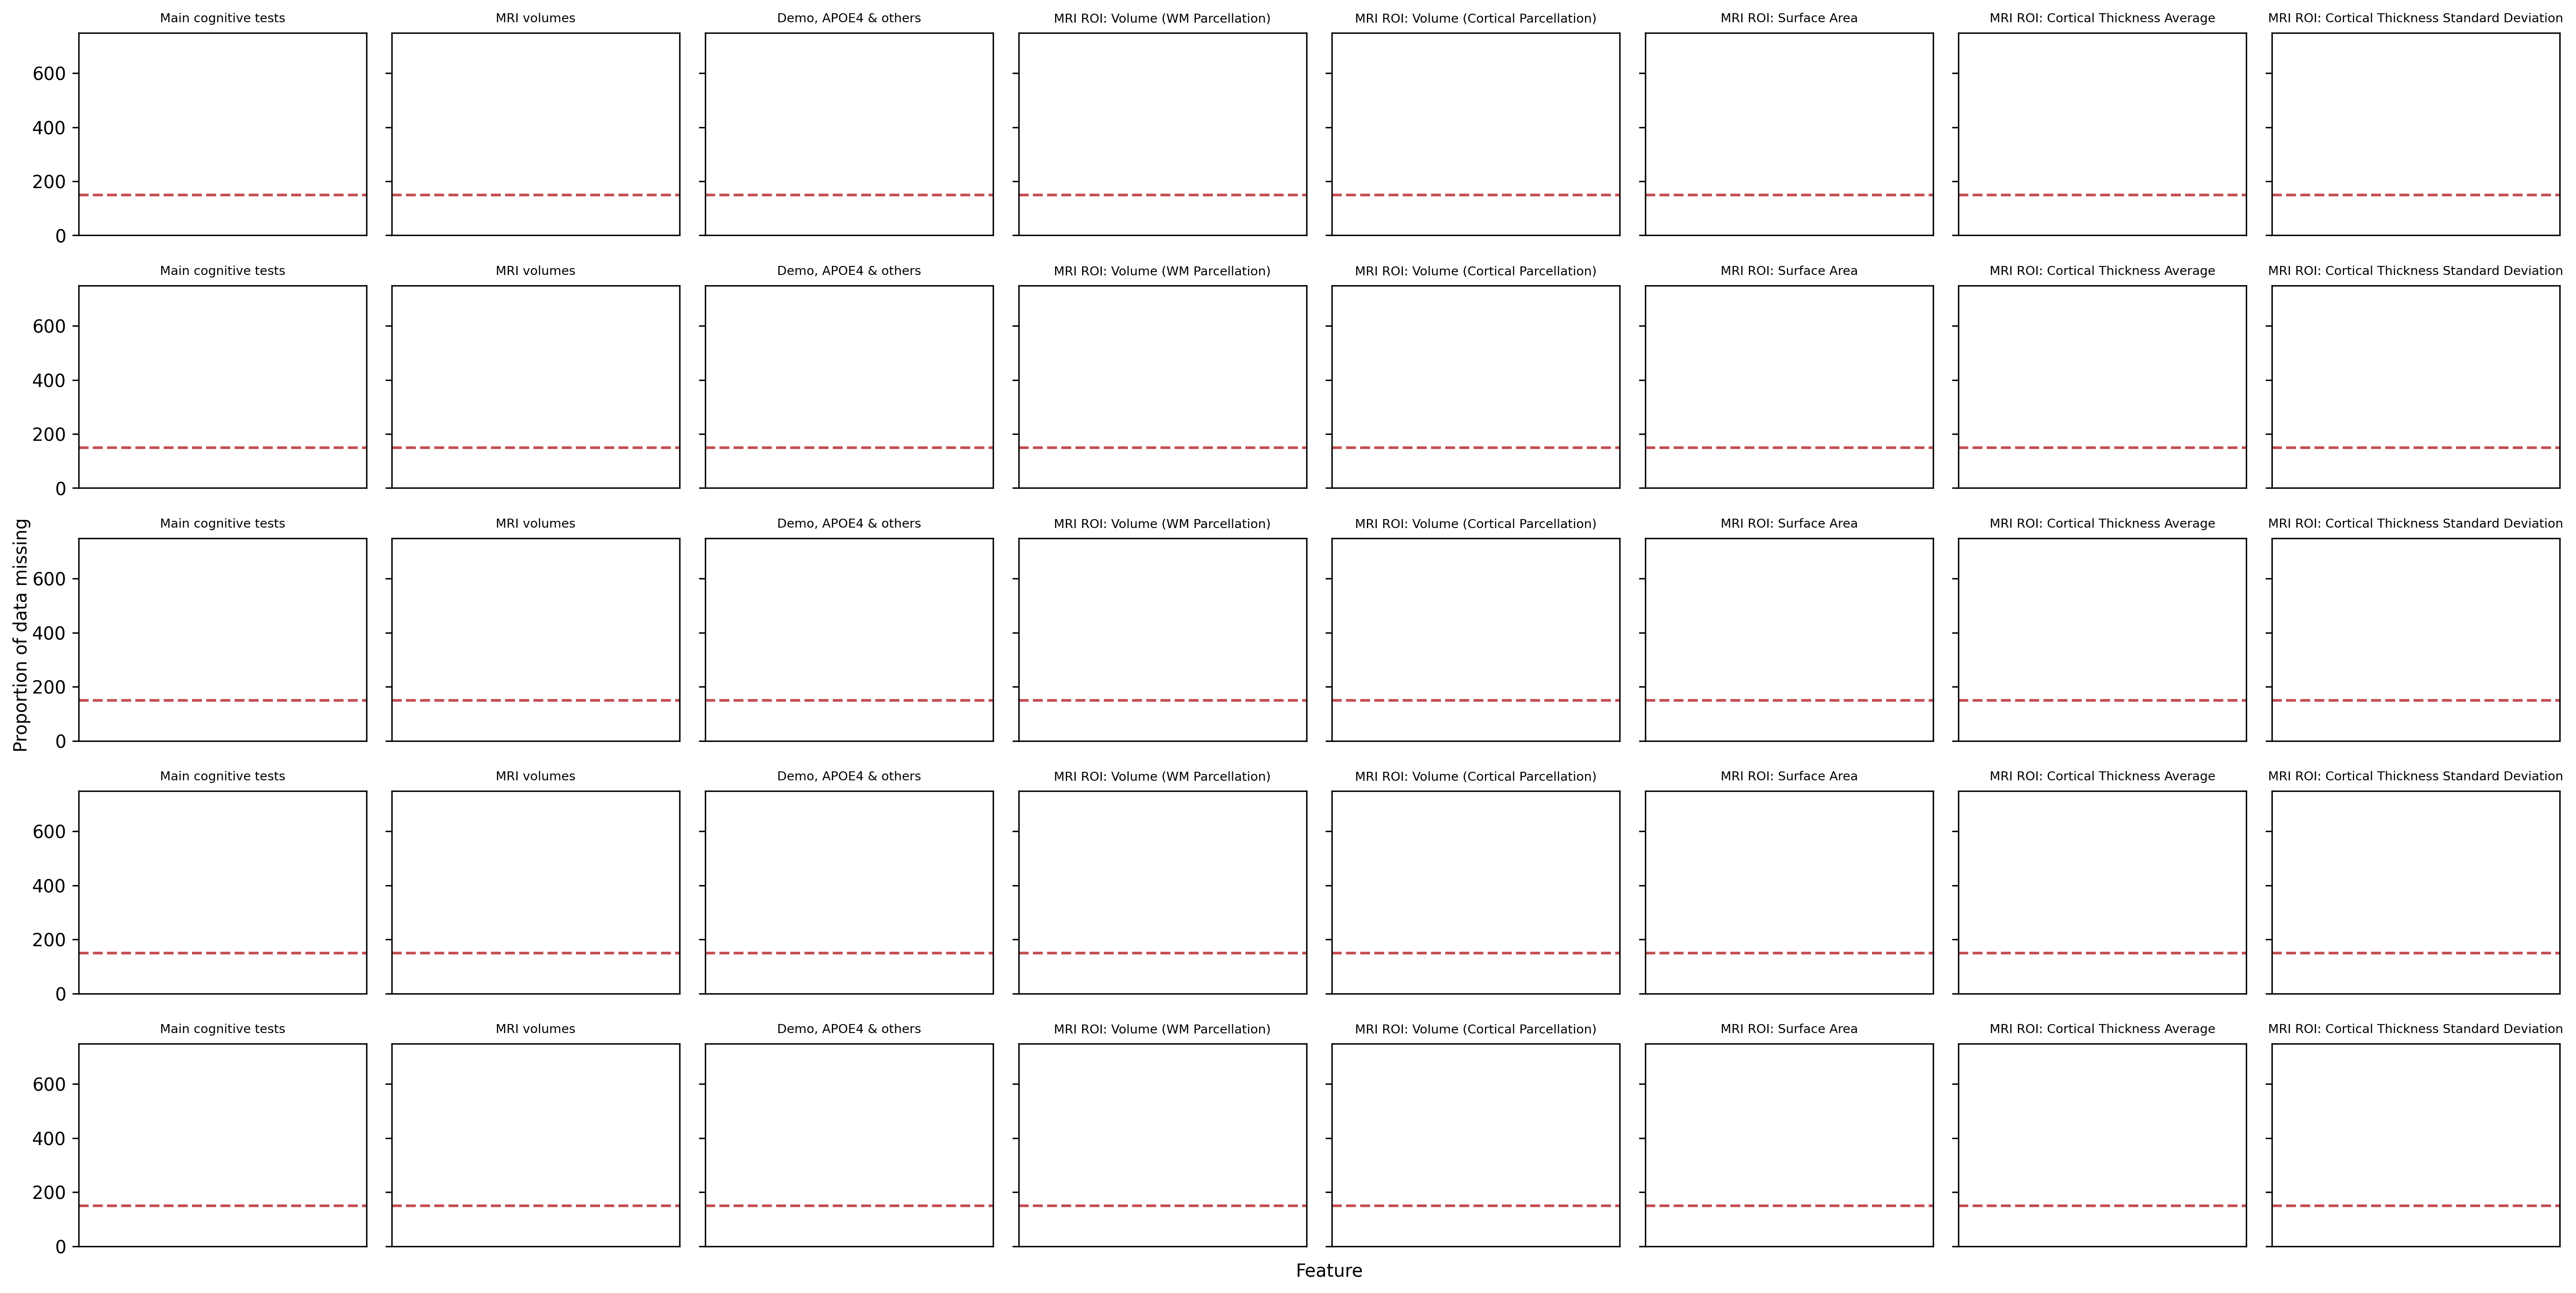

In [92]:
sns.reset_defaults()

missing_thresh = 0.3

# temp_df= copy.deepcopy(dx_modality_dict)

missing_values = pd.DataFrame(columns=chosen_order)
fig, axes = plt.subplots(len(chosen_order), 8, figsize=(20,10), dpi=300, sharey=True)
axCount = 0

# df_filt_miss = copy.deepcopy(df_filt)
# dx_modality_dict_miss = copy.deepcopy(dx_modality_dict)
# df_filt_miss = df_filt
# dx_modality_dict_miss = dx_modality_dict

for k in range(len(chosen_order)):
    # print(chosen_order[k])
    # te = df_filt_miss[df_filt_miss['VISCODE']==chosen_order[k]].index
    # data = data_[data_.index.isin(te)]
    missing_modes = []
    missing_modes = np.array(missing_modes)
    for i, mode in enumerate(df_dict[chosen_order[k]]):
        # print(mode)
        data = copy.deepcopy(df_dict[chosen_order[k]][mode])
        # data = data[data.index.isin(te)]
        data_c = list(final_df_dict[chosen_order[k]][mode].columns)
        missing_array = np.zeros(data.shape[1])
        for num, j in enumerate(data.columns):
            # missing_array[j] = data.shape[0] - data.iloc[:, j].isnull().sum()
            # missing_array[j] = 1 - data.iloc[:, j].isnull().sum()/data.shape[0]
            # missing_array[j] = data.iloc[:, j].isnull().sum()/data.shape[0]
            # missing_array[j] = data[:, j].isnull().sum()
            missing_array[num] = sum(np.isnan(data[j]))

            # if missing_array[j] > (data.shape[0]*missing_thresh):
            #     # data.drop(data_c[j], axis=1, inplace=True)
            #     try:
            #         dx_modality_dict_miss[mode].drop(data_c[j], axis=1, inplace=True)
            #     except KeyError:
            #         continue

            #     try:
            #         df_filt_miss.drop(data_c[j], inplace=True)
            #     except KeyError:
            #         continue
            # temp_df
        #['FDG'].isnull().sum()
        axes.flat[i].set_ylim([0, data.shape[0]])
        axes.flat[axCount].set_xticks([])
        axes.flat[axCount].bar(range(data.shape[1]), missing_array)
        axes.flat[axCount].set_title(mode.replace('_', ' '))
        axes.flat[axCount].title.set_size(7)
        axes.flat[axCount].axhline(y=data.shape[0]*missing_thresh, color='r', linestyle='--')
        # axes.flat[axCount].axhline(y=missing_thresh, color='r', linestyle='--')
        missing_modes = np.concatenate([missing_modes, missing_array])
        axCount+=1
    missing_values[chosen_order[k]] = missing_modes
    
# fig.suptitle(f'Feature availability proportion for {dx} baseline patients at --- {custom_order[k]}')
# plt.ylabel
# for ax in axes:
#     ax.set_xticks([])

plt.tight_layout()
fig.text(0.5, 0, 'Feature')
fig.text(0, 0.5, 'Proportion of data missing', va='center', rotation='vertical')
plt.show()

In [93]:

df_dict
for i in df_dict:
    print(i)
    for j in df_dict[i]:
        print(j, df_dict[i][j].shape)
    print()

bl
Main cognitive tests (749, 9)
MRI volumes (749, 3)
Demo, APOE4 & others (749, 8)
MRI ROI: Volume (WM Parcellation) (749, 40)
MRI ROI: Volume (Cortical Parcellation) (749, 69)
MRI ROI: Surface Area (749, 68)
MRI ROI: Cortical Thickness Average (749, 68)
MRI ROI: Cortical Thickness Standard Deviation (749, 68)

m06
Main cognitive tests (749, 9)
MRI volumes (749, 3)
Demo, APOE4 & others (749, 8)
MRI ROI: Volume (WM Parcellation) (749, 40)
MRI ROI: Volume (Cortical Parcellation) (749, 69)
MRI ROI: Surface Area (749, 68)
MRI ROI: Cortical Thickness Average (749, 68)
MRI ROI: Cortical Thickness Standard Deviation (749, 68)

m12
Main cognitive tests (749, 9)
MRI volumes (749, 3)
Demo, APOE4 & others (749, 8)
MRI ROI: Volume (WM Parcellation) (749, 40)
MRI ROI: Volume (Cortical Parcellation) (749, 69)
MRI ROI: Surface Area (749, 68)
MRI ROI: Cortical Thickness Average (749, 68)
MRI ROI: Cortical Thickness Standard Deviation (749, 68)

m24
Main cognitive tests (749, 9)
MRI volumes (749, 3)
D

In [94]:
# final_label_dict
for i in final_label_dict:
    print(i, final_label_dict[i].shape)
    # for j in final_label_dict[i]:
    #     print(j, final_label_dict[i][j].shape)
    # print()

bl (749,)
m06 (749,)
m12 (749,)
m24 (749,)
m36 (749,)


In [96]:
label_dict = copy.deepcopy(final_label_dict)
for i in final_label_dict:
    # print(i, final_label_dict[i])
    label_dict[i] = label_dict[i].reset_index(drop=True)

In [97]:
labels = pd.DataFrame(label_dict)
labels
    # label_dict[i] = label_dict[i].reset_index(drop=True)

,bl,m06,m12,m24,m36
0,NL,NL,NL,NL,NL
1,MCI,MCI,MCI,NL,MCI
2,NL,NL,NL,NL,NL
3,NL,NL,NL,NL,NL
4,NL,NL,NL,NL,NL
...,...,...,...,...,...
744,MCI,MCI,MCI,Dementia,NL
745,MCI,MCI,NL,NL,MCI
746,NL,NL,MCI,MCI,MCI
747,NL,MCI,MCI,MCI,MCI


In [98]:
for i in label_dict:
    print(i, label_dict[i].shape)

bl (749,)
m06 (749,)
m12 (749,)
m24 (749,)
m36 (749,)


In [99]:
df_dict['bl']['Demo, APOE4 & others']

,AGE,PTGENDER,PTEDUCAT,PTRACCAT,PTMARRY,APOE4_0.0,APOE4_1.0,APOE4_2.0
0,0.526119,1.0,0.714286,1.000000,0.333333,1.0,0.0,0.0
1,0.776119,0.0,0.500000,1.000000,0.333333,1.0,0.0,0.0
2,0.705224,0.0,0.428571,1.000000,0.000000,1.0,0.0,0.0
3,0.791045,1.0,0.857143,1.000000,0.333333,0.0,1.0,0.0
4,0.238806,1.0,0.214286,0.333333,0.333333,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
744,0.130597,1.0,0.714286,1.000000,0.333333,1.0,0.0,0.0
745,0.750000,1.0,0.785714,1.000000,1.000000,0.0,1.0,0.0
746,0.641791,1.0,0.714286,1.000000,0.333333,1.0,0.0,0.0
747,0.623134,0.0,0.428571,1.000000,1.000000,1.0,0.0,0.0


In [ ]:
dx_valueCounts_time_CN_ = dx_dict['CN'].groupby(['DX'])['VISCODE'].value_counts()
dx_valueCounts_time_MCI_ = dx_dict['MCI'].groupby(['DX'])['VISCODE'].value_counts()

In [ ]:
dx_valueCounts_time_CN = pd.DataFrame(dx_valueCounts_time_CN_)

# dx_valueCounts_time_CN
custom_order = ['bl', 'm03', 'm06', 'm12', 'm18', 'm24', 'm30', 'm36', 'm42', 'm48', 'm54', 'm60', 'm66', 'm72', 'm78', 'm84', 'm90', 'm96', 'm102', 'm108', 'm114', 'm120']

dx_grp_cn = {}

temp = dx_valueCounts_time_CN.loc['NL']
dx_grp_cn['NL'] = temp.reindex(custom_order).reset_index()

temp1 = dx_valueCounts_time_CN.loc['NL to MCI'].reindex(custom_order).reset_index()
temp2 = dx_valueCounts_time_CN.loc['MCI'].reindex(custom_order).reset_index()

temp1['count'] = temp1['count'].fillna(0) + temp2['count'].fillna(0)
temp1.replace(0, np.nan, inplace=True)

dx_grp_cn['MCI'] = temp1

temp3 = dx_valueCounts_time_CN.loc['NL to Dementia'].reindex(custom_order).reset_index()
temp4 = dx_valueCounts_time_CN.loc['MCI to Dementia'].reindex(custom_order).reset_index()
temp5 = dx_valueCounts_time_CN.loc['Dementia'].reindex(custom_order).reset_index()

temp3['count'] = temp3['count'].fillna(0) + temp4['count'].fillna(0) + temp5['count'].fillna(0)
temp3.replace(0, np.nan, inplace=True)
dx_grp_cn['DEM'] = temp3



In [ ]:
# dx_grp_cn = pd.DataFrame(dx_grp_cn, index=custom_order)
dx_grp_cn
plt.figure(figsize=(12, 6))
plt.plot(custom_order, np.array(dx_grp_cn['NL']['count']), marker='o', label='Remain CN')
plt.plot(custom_order, np.array(dx_grp_cn['MCI']['count']), marker='o', label='MCI')
plt.plot(custom_order, np.array(dx_grp_cn['DEM']['count']), marker='o', label='DEM')
# plt.plot(custom_order, np.array(value_counts['CN']), marker='o', label='Total baseline CN')

plt.title('Number of patients over visits with baseline CN')
plt.xlabel('Timeline')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
dx_valueCounts_time_MCI = pd.DataFrame(dx_valueCounts_time_MCI_)

# dx_valueCounts_time_CN
custom_order = ['bl', 'm03', 'm06', 'm12', 'm18', 'm24', 'm30', 'm36', 'm42', 'm48', 'm54', 'm60', 'm66', 'm72', 'm78', 'm84', 'm90', 'm96', 'm102', 'm108', 'm114', 'm120']

dx_grp_mci = {}

# temp = dx_valueCounts_time_MCI.loc['MCI']
# dx_grp_cn['NL'] = temp.reindex(custom_order).reset_index()

temp1 = dx_valueCounts_time_MCI.loc['NL to MCI'].reindex(custom_order).reset_index()
temp2 = dx_valueCounts_time_MCI.loc['MCI'].reindex(custom_order).reset_index()

temp1['count'] = temp1['count'].fillna(0) + temp2['count'].fillna(0)
temp1.replace(0, np.nan, inplace=True)

dx_grp_mci['MCI'] = temp1

# temp3 = dx_valueCounts_time_MCI.loc['NL to Dementia'].reindex(custom_order).reset_index()
temp4 = dx_valueCounts_time_MCI.loc['MCI to Dementia'].reindex(custom_order).reset_index()
temp5 = dx_valueCounts_time_MCI.loc['Dementia'].reindex(custom_order).reset_index()

temp4['count'] = temp4['count'].fillna(0) + temp5['count'].fillna(0)
temp4.replace(0, np.nan, inplace=True)
dx_grp_mci['DEM'] = temp4



dx_valueCounts_rid_CN_ = dx_dict['CN'].groupby(['RID'])
dx_valueCounts_rid_MCI_ = dx_dict['MCI'].groupby(['RID'])['VISCODE'].value_counts()
max_time = len(dx_dict['CN']['VISCODE'].unique())
nTimePoints = []
# for i in dx_dict['CN'].groupby(['RID']):
#     print(i['VISCODE'].value_counts())
#     break
    # nTimePoints.append(len(i['VISCODE']))
# dx_valueCounts_rid_CN_['VISCODE'].value_counts().sum()
dx_valueCounts_rid_MCI_

dx_valueCounts_rid_MCI_ = pd.DataFrame(dx_valueCounts_rid_MCI_)
# dx_valueCounts_rid_MCI_.reindex(custom_order).reset_index()
dx_valueCounts_rid_MCI_
temp = dx_valueCounts_rid_MCI_.reset_index(['RID', 'VISCODE'])
temp
for i in temp.groupby('RID'):
    print(list(i[1]['VISCODE']))
    break

In [ ]:
# rids = list(dx_dict['CN']['RID'].unique())
# for i in rids:
#     print(dx_dict['CN'].loc[i, 'VISCODE'])
#     break
temp = dx_dict['CN'][['RID', 'VISCODE']]
# temp
# custom_order_dict = {}
# for i, j in enumerate(custom_order):
#     custom_order_dict[j] = i
# print(custom_order_dict)

# temp_new = pd.DataFrame(columns=['RID', ''])
rids_ = []
visits_ = []
for i in temp.groupby('RID'):
    # print(i[0], list(i[1]['VISCODE']))

    vi = list(i[1]['VISCODE'])

    rids_.append(i[0])
    temp_visit = []
    for k in custom_order:
        if k in vi:
            temp_visit.append(1)
        else:
            temp_visit.append(np.nan)
    # print(temp_visit)
    visits_.append(temp_visit)
    # print(i)
    # print(visits_)
nvisits = pd.DataFrame(visits_, columns=custom_order, index=rids_)
nvisits = nvisits.reset_index(drop=True)

In [ ]:
bl_dx_dict = {}
bl_dx_dict['cn_mci_dem'] = dx_dict['CN'][(dx_dict['CN']['DX']=='NL to MCI') | (dx_dict['CN']['DX']=='MCI')  | (dx_dict['CN']['DX']=='MCI to Dementia')
                                   | (dx_dict['CN']['DX']=='Dementia')  | (dx_dict['CN']['DX']=='NL to Dementia')]


bl_dx_dict['mci_dem'] = dx_dict['MCI'][(dx_dict['MCI']['DX']=='MCI to Dementia') | (dx_dict['MCI']['DX']=='Dementia')]



# mci_dem = 
# len(cn_mci['RID'].unique())
bl_value_counts_dict = {}
for i in bl_dx_dict:
    print('Number of patients in  ' + i +  ' : ' + str(len(bl_dx_dict[i]['RID'].unique())))
    value_counts_dict[i] = dx_dict[i]['VISCODE'].value_counts()

In [ ]:
import matplotlib.pyplot as plt

# Sample data of number of patients visiting a hospital over the years categorized by diseases
years = [2018, 2019, 2020, 2021, 2022]  # Years
disease1 = [1000, 1200, 1300, 1100, 900]  # Number of patients with Disease 1 for each year
disease2 = [800, 1000, 1100, 950, 850]   # Number of patients with Disease 2 for each year
disease3 = [1200, 1300, 1500, 1400, 1600] # Number of patients with Disease 3 for each year

# Plotting the stacked area plot with improved aesthetics
plt.figure(figsize=(10, 6))

plt.stackplot(years, disease1, disease2, disease3, labels=['Disease 1', 'Disease 2', 'Disease 3'], colors=['#FF5733', '#33FF57', '#3333FF'], alpha=0.8)
plt.title('Number of Patients Visiting the Hospital Over the Years (Categorized by Diseases)')
plt.xlabel('Year')
plt.ylabel('Number of Patients')
plt.xticks(years)  # Set x-axis ticks to display all years
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left')
plt.tight_layout()

# Displaying the plot
plt.show()


In [ ]:
# df2.loc[:, "Date Local"] = pd.to_datetime(df2["Date Local"])
# len(df['RID'].unique())
# df = df.reset_index()
# df.head()

In [ ]:
# len(df['PTID'].unique())
# del df['PTID']

In [ ]:
from ydata_profiling import ProfileReport
# from ydata_profiling.utils.cache import cache_file
from ydata_profiling.visualisation.plot import timeseries_heatmap


In [ ]:
# timeseries_heatmap(dataframe=df, entity_column="RID", sortby="VISCODE")

In [ ]:
# profile = ProfileReport(filtered_time_series_data, tsmode=True, sortby="Date Local")
# profile.to_file('profile_report.html')

In [ ]:
# Return the profile per station
for group in df2.groupby("Site Num"):
    # Running 1 profile per station
    profile = ProfileReport(
        group[1],
        tsmode=True,
        sortby="Date Local",
        # title=f"Air Quality profiling - Site Num: {group[0]}"
    )

    profile.to_file(f"Ts_Profile_{group[0]}.html")